# Marketing Churn Winbacks

The main aim of this project is to save active customers from churning.
From this project we want to be able to segment our customers into 

1. 30 DAYS PURCHASE AND USAGE(BASED ON LAST PURCHASE AND LAST USAGE)

2. 60 DAYS PURCHASE AND USAGE(BASED ON LAST PURCHASE AND LAST USAGE)

3. 90 DAYS DAYS PURCHASE AND USAGE(BASED ON LAST PURCHASE AND LAST USAGE)

Also we will have to extract data usage and Data Purchase and do these analysis.

We want to be able to also win a bit of the Winbacks atleast 1%

LETS GET STARTED.
 


# THE DATA

So the data is in .xlx so lets see how we can import it in 

This data was pulled as of 14th Jan 2021.

Hence we need to mention that in our analysis

Lets import the libraries we want to work with 
we will use pandas and numpy for our data exploration 


In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series


import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

We will decided to work with the purchase data first.

This is because we are able to get some answers to our goal here.

We can get the last purchase history for all our clients

Note we had to parse the date into ad date and time format

This will help us to manipulate our date later on

Also we changed the data type for our 'ACC_NBR' and 'PHONE_NUMBER' to object

It makes it easy for data wrangling

In [2]:
url="C:/Users/287910031/Desktop/BUSY CHURN PROJECT DATA/All Purchases.xlsx"

All_purchase=pd.read_excel(url,sheet_name="Export Worksheet",parse_dates=["PURCHASE_DATE"],dtype={'ACC_NBR':object,"PHONE_NUMBER":object})

KeyboardInterrupt: 

In [ ]:
All_purchase.info()

This Purchase data is from 14th Jan.

Also note that, we have an almost clean data.

We are going to clean our data.

First we will clean the columns,there is B.SALE_LISR_PRICE/100 this is the same as PRICE

There are some null values in there so we will have to search and know why

Then get the right answers from the team.

In [ ]:
All_purchase.columns

LETS RENAME OUR COLUMNS USING THE .rename feature in a df

For this project it makes the work easier

In [ ]:
All_purchase=All_purchase.rename(columns={'B.SALE_LIST_PRICE/100':'PRICE'})

Now lets look for the null values in the PRICE SECTION.

For the Phone Number Column, we will ignore it.

Because it doesn't affect our Goal.

In [ ]:
All_purchase[All_purchase['PRICE'].isna()]['OFFER_NAME'].unique()

From our check its clear most of these bundles are hybrid and post-paid bundles.

So we need to check the data again since our focus is prepaid numbers.

So lets go back to our SQL DATA, to verify our code.

If we find out that its correct we can go ahead and get the price for these customers.



So we had to get another data. Reasons: Data we used at first contained Postpaid Customers.

From enquiries from stakeholders our focus is on Prepaid Customers.

So we needed to extract data again 

In [4]:
url="C:/Users/287910031/Desktop/BUSY CHURN PROJECT DATA/Prepaid_His.xlsx"
Prep_Churn=pd.read_excel(url,sheet_name="Export Worksheet",parse_dates=["PURCHASE_DATE"],dtype={'ACC_NBR':object,"PHONE_NUMBER":object})

In [5]:
Prep_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855986 entries, 0 to 855985
Data columns (total 6 columns):
ACC_NBR          855986 non-null object
PRICE            793121 non-null float64
PHONE_NUMBER     854978 non-null object
OFFER_NAME       855986 non-null object
PURCHASE_DATE    855986 non-null datetime64[ns]
DETAILS          855986 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 39.2+ MB


So we still have some data in the price sector that is null
lets explore it and see

In [6]:
Prep_Churn[Prep_Churn['PRICE'].isna()]['OFFER_NAME'].unique()

array(['Corporate 500MB Data', '1GB Data', '4 Day Trial Bundle',
       'Corporate 1GB Data', '25GB Prepaid Business Bundle',
       'Hybrid SOHO Base Bundle 20GB', 'Hybrid SOHO Midi Bundle 40GB',
       'Hybrid SME Burst Bundle 100GB', 'Hybrid SME Boom Bundle 80GB',
       'Hybrid SME Ultimate Package', '3mbps Shared',
       'Corporate 2GB Data'], dtype=object)

Our first conclusion that these bundles where mostly unlimited bundles is wrong.
They seem to be hybrind customers.
It makes sense to take them out 

Since we want fully pre paid guys.

Hence we will have to drop them.
Most of these bundles are recurring.
We want bundle purchased.

Hence we should be on the look for InHouse and Complimentary guys.
We need to leave the 1GB Data guy he is a prepaid guy

So it means we need to replace the 1GB guys with a value

The price of 1GB was 16 cedis


In [7]:
mask=Prep_Churn['OFFER_NAME']=='1GB Data'
Prep_Churn.loc[mask,'PRICE']=Prep_Churn.loc[mask,'PRICE'].fillna(16)

For the code above i want to give a little explanation.

If wee do anormal fillna for the columns with offer name 1gb 

and change the value for 1gb it will fail.

So first get the data for 1gb
pur it in variable.

now take the loc of the variable and the column you are looking at.
then do the fill na on those rows.

In [8]:
Prep_Churn[Prep_Churn['OFFER_NAME']=='1GB Data']

,ACC_NBR,PRICE,PHONE_NUMBER,OFFER_NAME,PURCHASE_DATE,DETAILS
35,106172,16.0,0278818675,1GB Data,2016-01-31 01:54:50,Consumer
42,101182,16.0,0502285334,1GB Data,2016-02-18 07:47:36,Consumer
46,101350,16.0,0248344386,1GB Data,2016-02-13 17:48:43,Consumer
47,106313,16.0,0501297124,1GB Data,2016-02-14 10:43:26,Consumer
49,110071,16.0,0245990445,1GB Data,2016-02-12 00:21:46,Consumer
53,106191,16.0,0244081919,1GB Data,2016-02-15 11:35:13,Consumer
57,108249,16.0,0244235605,1GB Data,2016-02-08 10:43:34,Consumer
61,101350,16.0,0248344386,1GB Data,2016-02-06 20:29:45,Consumer
62,110360,16.0,0248180672,1GB Data,2016-02-14 23:34:18,Consumer
63,101350,16.0,0248344386,1GB Data,2016-02-08 10:12:56,Consumer


Now lets delete the rest as they will not have any impact on our data.



In [9]:
Prep_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855986 entries, 0 to 855985
Data columns (total 6 columns):
ACC_NBR          855986 non-null object
PRICE            852947 non-null float64
PHONE_NUMBER     854978 non-null object
OFFER_NAME       855986 non-null object
PURCHASE_DATE    855986 non-null datetime64[ns]
DETAILS          855986 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 39.2+ MB


In [10]:
Prep_Churn.dropna(subset=['PRICE'],inplace=True)

In [11]:
Prep_Churn['PRICE'].isna().sum()

0

We are not done with the data cleaning.

We need the last purchase date.

So we will first arrange all the data in ascending order by PURCHASE_DATE.

Then we will go ahead and delete duplicates for previous records

In [12]:
Purchase_History=Prep_Churn.sort_values(by='PURCHASE_DATE',ascending=False)



So from purchase History data we have data for all clients who made purchase of a prepaid bundle.
Now we can go ahead and put the functions we created below for the churn_days and churn

Remember we need to bring the pd.Timestamp for our current date also.

So we want to do the analysis on the larger dataset first.

then we can focus on the latest purchase,then break it down to segements.


In [13]:
Purchase_History['DATE']=Purchase_History['PURCHASE_DATE'].dt.date

In [14]:
Purchase_History['TIME']=Purchase_History['PURCHASE_DATE'].dt.time

In [15]:
Purchase_History['Weekday_name']=Purchase_History['PURCHASE_DATE'].dt.weekday_name

In [16]:
Purchase_History['DATE']=pd.to_datetime(Purchase_History['DATE'])

In [17]:
Purchase_History.head()

,ACC_NBR,PRICE,PHONE_NUMBER,OFFER_NAME,PURCHASE_DATE,DETAILS,DATE,TIME,Weekday_name
748659,117474,8.0,0247588620,1.5GB Big Value Data,2022-01-17 17:53:42,Consumer,2022-01-17,17:53:42,Monday
748658,128413,40.0,05660156323,7.5GB Big Value Data,2022-01-17 17:46:54,Consumer,2022-01-17,17:46:54,Monday
427630,186652,8.0,0244772357,1.5GB Big Value Data,2022-01-17 17:42:52,Consumer,2022-01-17,17:42:52,Monday
641585,118605,82.0,0244178780,Super Data,2022-01-17 17:26:41,Consumer,2022-01-17,17:26:41,Monday
213027,109187,8.0,0230351531,1.5GB Big Value Data,2022-01-17 17:25:43,Consumer,2022-01-17,17:25:43,Monday


# CHURN_DATE FUNCTION

This fuction is takes in a set date. Then substracts the date from the role we are looking at.

It then return the Number of Churn days.

In [18]:
current_date=pd.to_datetime('2022-1-19')
import datetime as dt

def churn_date(row):
    actual_day=(current_date - row)
    return (actual_day)


In [19]:
Purchase_History['Num_Churn_Days']=Purchase_History['DATE'].apply(churn_date)

In [20]:
Purchase_History['Num_Churn_Days']=Purchase_History['Num_Churn_Days'].dt.days

In [21]:
Purchase_History.head()

,ACC_NBR,PRICE,PHONE_NUMBER,OFFER_NAME,PURCHASE_DATE,DETAILS,DATE,TIME,Weekday_name,Num_Churn_Days
748659,117474,8.0,0247588620,1.5GB Big Value Data,2022-01-17 17:53:42,Consumer,2022-01-17,17:53:42,Monday,2
748658,128413,40.0,05660156323,7.5GB Big Value Data,2022-01-17 17:46:54,Consumer,2022-01-17,17:46:54,Monday,2
427630,186652,8.0,0244772357,1.5GB Big Value Data,2022-01-17 17:42:52,Consumer,2022-01-17,17:42:52,Monday,2
641585,118605,82.0,0244178780,Super Data,2022-01-17 17:26:41,Consumer,2022-01-17,17:26:41,Monday,2
213027,109187,8.0,0230351531,1.5GB Big Value Data,2022-01-17 17:25:43,Consumer,2022-01-17,17:25:43,Monday,2


# CHURN FUNCTION

This function returns a Yes or No response. This will evalute the number of churn days, then it will go ahead and return a "No"
if the churn days is greater than 0 but less thanor equal to 150.

We return a Yes if the rows are greater than 150 means that customer has churned

In [22]:
def churn(row):
    if 0 < row <=150:
        return "No"
    elif row > 150:
        return"Yes"

In [23]:
Purchase_History['Num_Churn_Days']=Purchase_History['Num_Churn_Days'].astype(int)

In [24]:
Purchase_History['Churn']=Purchase_History['Num_Churn_Days'].apply(churn)

Text(0.5,1,'Churn Vrs No_Chur Percentage')

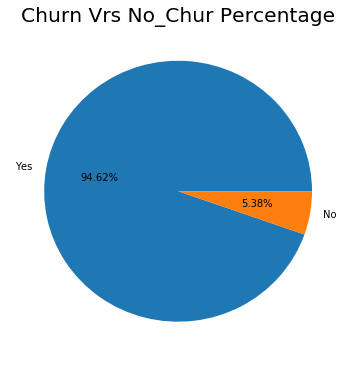

In [25]:
Purchase_History['Churn'].value_counts().plot.pie(figsize=(6,6),autopct="%.2f%%")
plt.ylabel("")
plt.style.use('fivethirtyeight')
plt.title("Churn Vrs No_Chur Percentage")

From above we see that per our 5 months history, we realise that we have 5% customers who are not churning.

This is not our actual churn rate. This is because customer A may have made more than one purchase on a said date.

If we consider that it means customer A is counted twice and hence will make the numbers large.

To get purchase churn rate, we need to get the last purchase of customers then draw the pie chart 

But this data will help us know which bundles are doing well and at what time as it is a better representative than the last 

purchases.

In [26]:
Purchase_History.OFFER_NAME.value_counts().sort_values(ascending=False).head(10)

Sankofa 7GB Data          112197
Sankofa 3GB Data           98404
1DAY Unlimited Bundle      77262
1.5GB Big Value Data       67624
Sankofa 15GB Data          64919
1GB Data                   59826
Extreme Data               56952
Super Data                 27093
3.5GB Big Value Data       23564
Super Unlimited Bundle     22889
Name: OFFER_NAME, dtype: int64

From our top(10) for our  Historical data we realise that some bundles which have been discontinued performed well.
these bundles are sankofa bundles and 1gb data.

We need to visualize it.

Text(0,0.5,'Data Bundles')

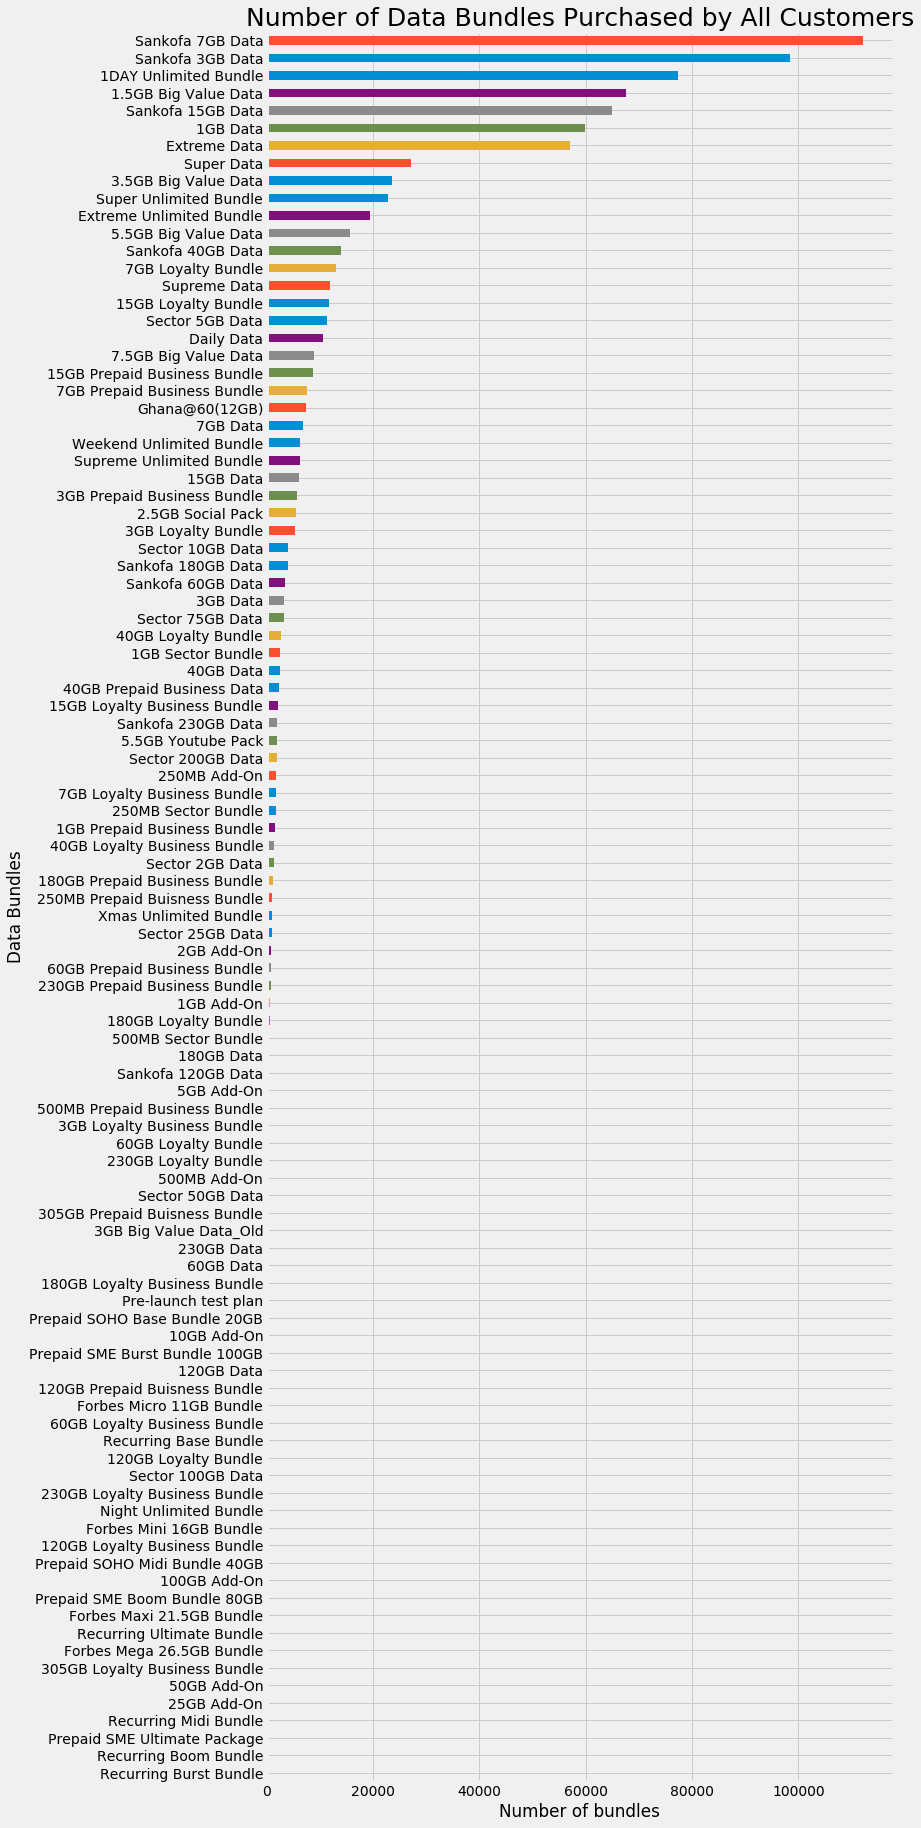

In [27]:
graph =Purchase_History.OFFER_NAME.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,30))
plt.title('Number of Data Bundles Purchased by All Customers',size=25)
plt.style.use('fivethirtyeight')
plt.xlabel("Number of bundles")
plt.ylabel('Data Bundles')

Lets do for top(20) for these clients 


Text(0,0.5,'Data Bundles')

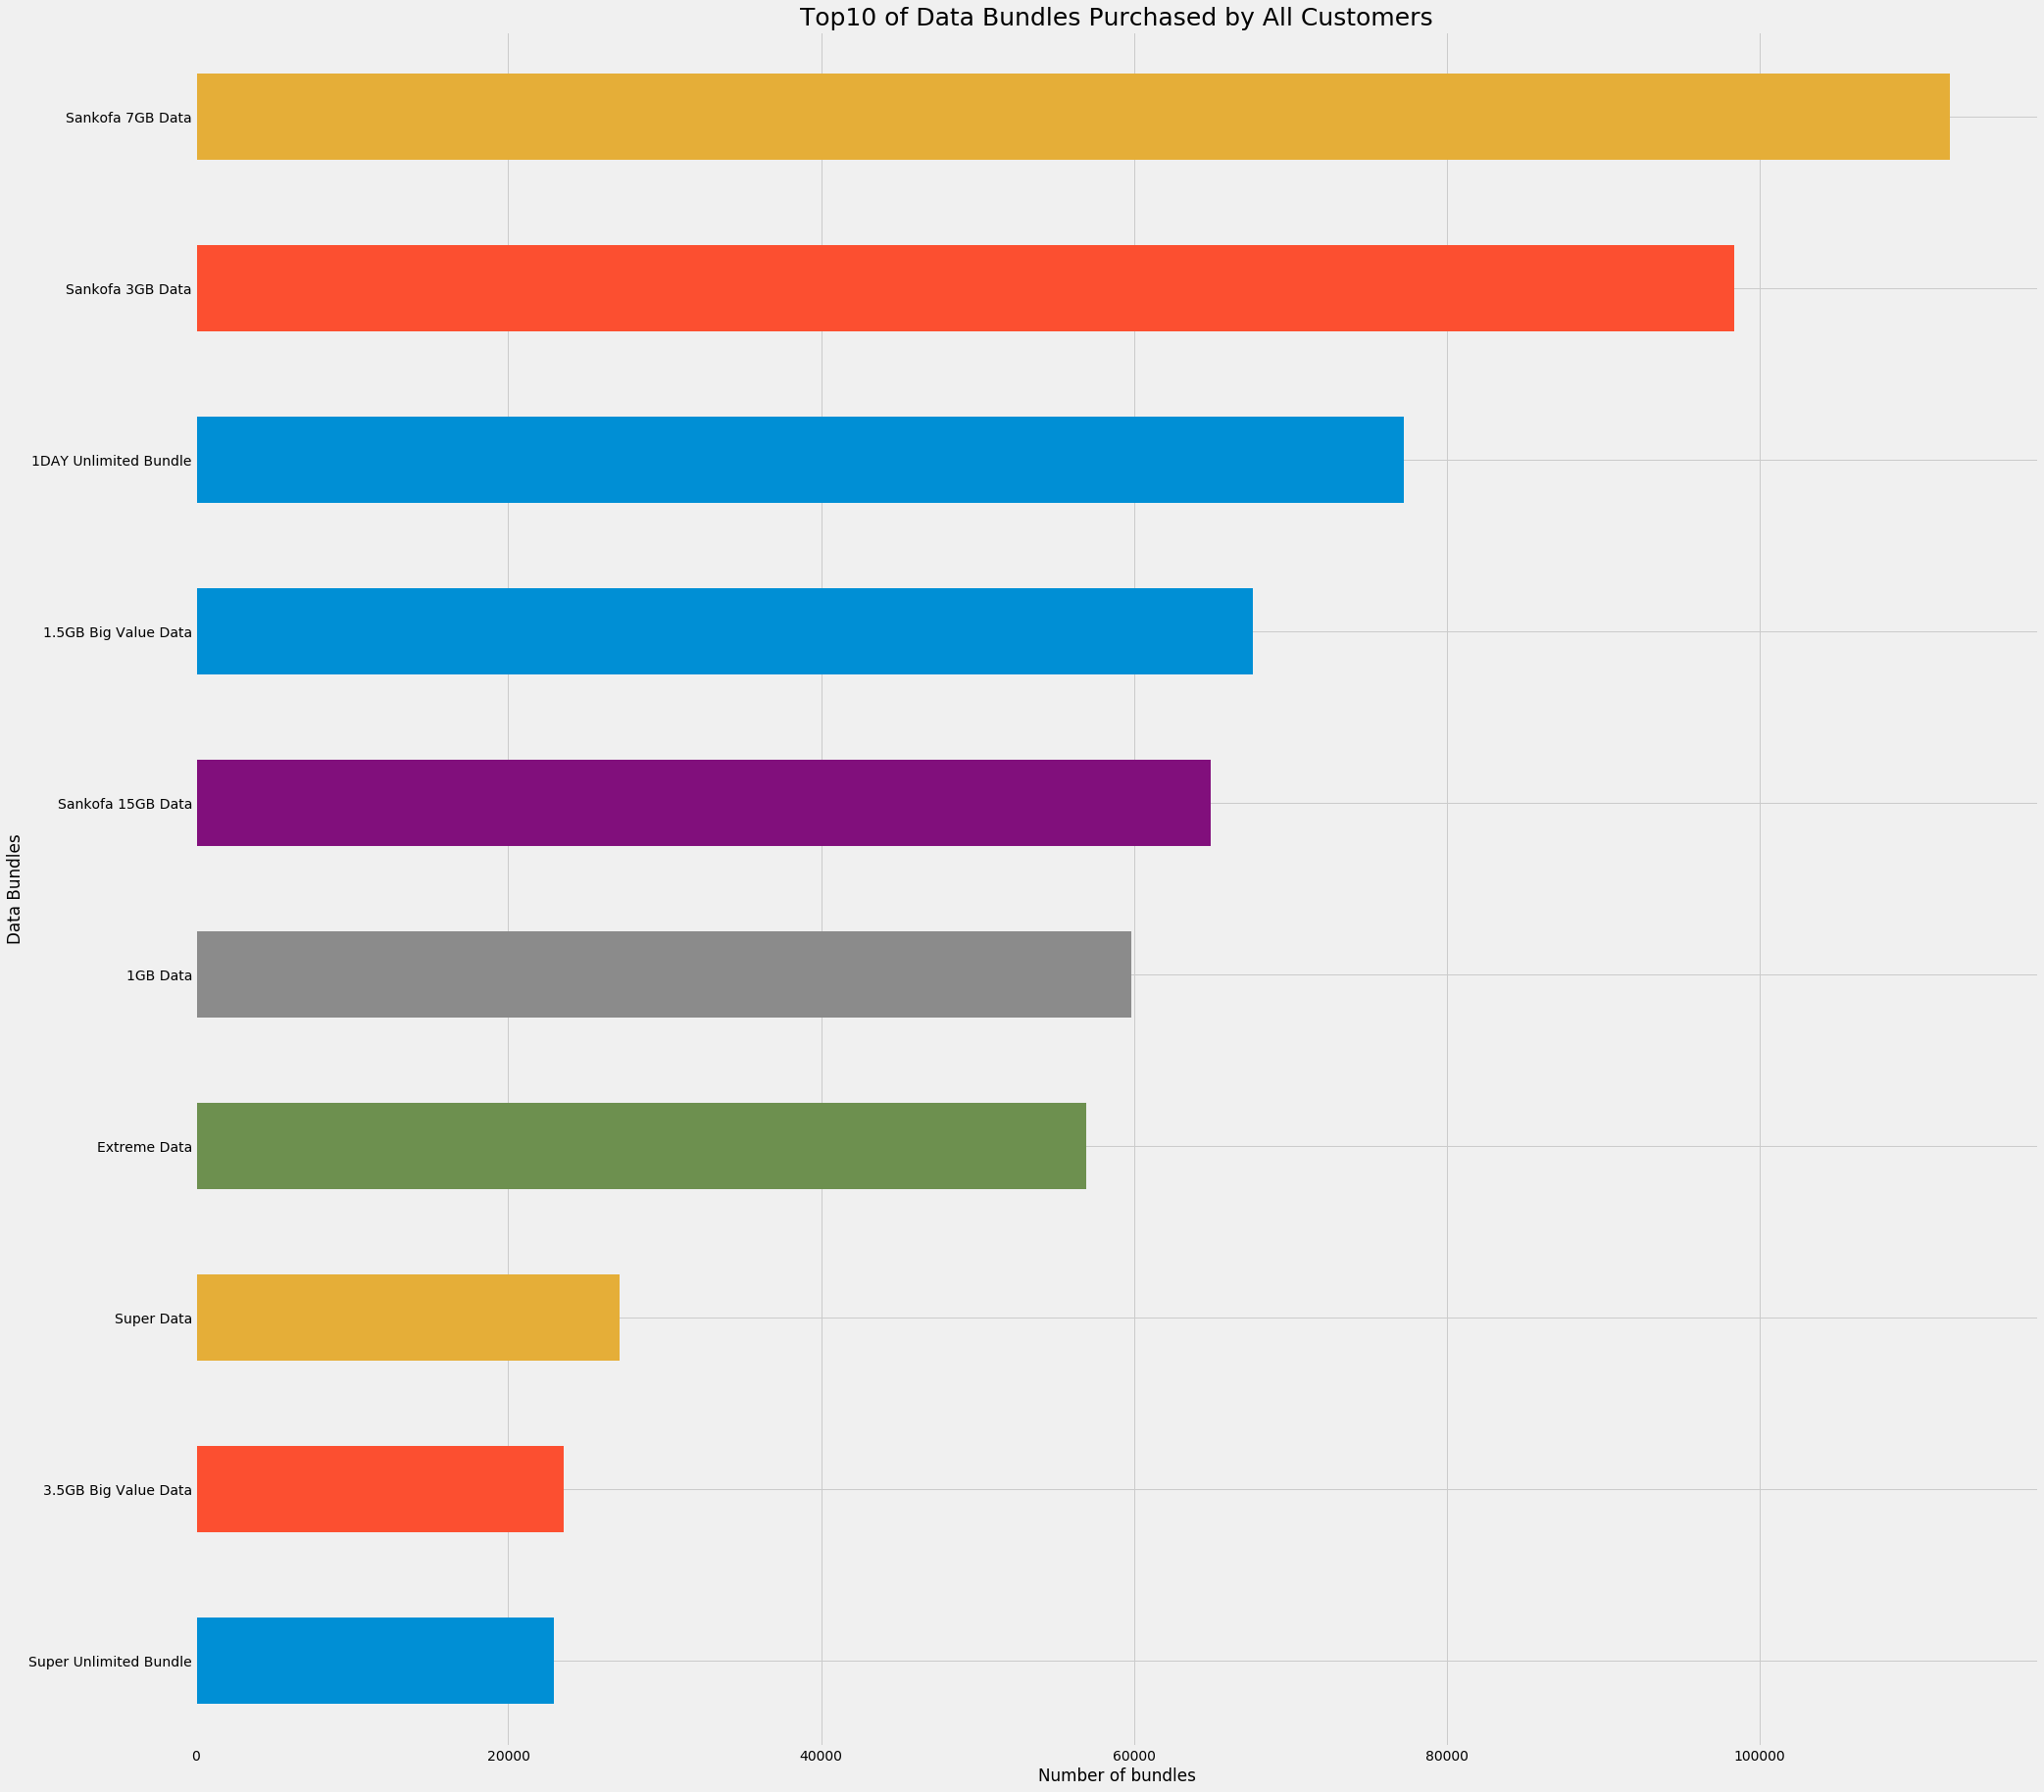

In [28]:
graph2 =Purchase_History.OFFER_NAME.value_counts().head(10).sort_values(ascending=True).plot.barh(figsize=(30,30))
plt.title('Top10 of Data Bundles Purchased by All Customers',size=25)
plt.style.use('fivethirtyeight')
plt.xlabel("Number of bundles")
plt.ylabel('Data Bundles')

This won't be a correct representation why?

Because we have customers who have churned.

So let's take only those who have not churnned.

Then look at their bundle purchase


In [29]:
Purchase_History.head()

,ACC_NBR,PRICE,PHONE_NUMBER,OFFER_NAME,PURCHASE_DATE,DETAILS,DATE,TIME,Weekday_name,Num_Churn_Days,Churn
748659,117474,8.0,0247588620,1.5GB Big Value Data,2022-01-17 17:53:42,Consumer,2022-01-17,17:53:42,Monday,2,No
748658,128413,40.0,05660156323,7.5GB Big Value Data,2022-01-17 17:46:54,Consumer,2022-01-17,17:46:54,Monday,2,No
427630,186652,8.0,0244772357,1.5GB Big Value Data,2022-01-17 17:42:52,Consumer,2022-01-17,17:42:52,Monday,2,No
641585,118605,82.0,0244178780,Super Data,2022-01-17 17:26:41,Consumer,2022-01-17,17:26:41,Monday,2,No
213027,109187,8.0,0230351531,1.5GB Big Value Data,2022-01-17 17:25:43,Consumer,2022-01-17,17:25:43,Monday,2,No


In [30]:
Active_purchase_history=Purchase_History[Purchase_History['Churn']=='No']

In [31]:
Active_purchase_history.OFFER_NAME.value_counts().head(10)

1DAY Unlimited Bundle       14340
Daily Data                   7980
1.5GB Big Value Data         4472
3.5GB Big Value Data         2005
7GB Data                     1979
Super Unlimited Bundle       1854
Super Data                   1631
15GB Data                    1479
Extreme Unlimited Bundle     1272
Extreme Data                 1119
Name: OFFER_NAME, dtype: int64

Text(0,0.5,'Data Bundles')

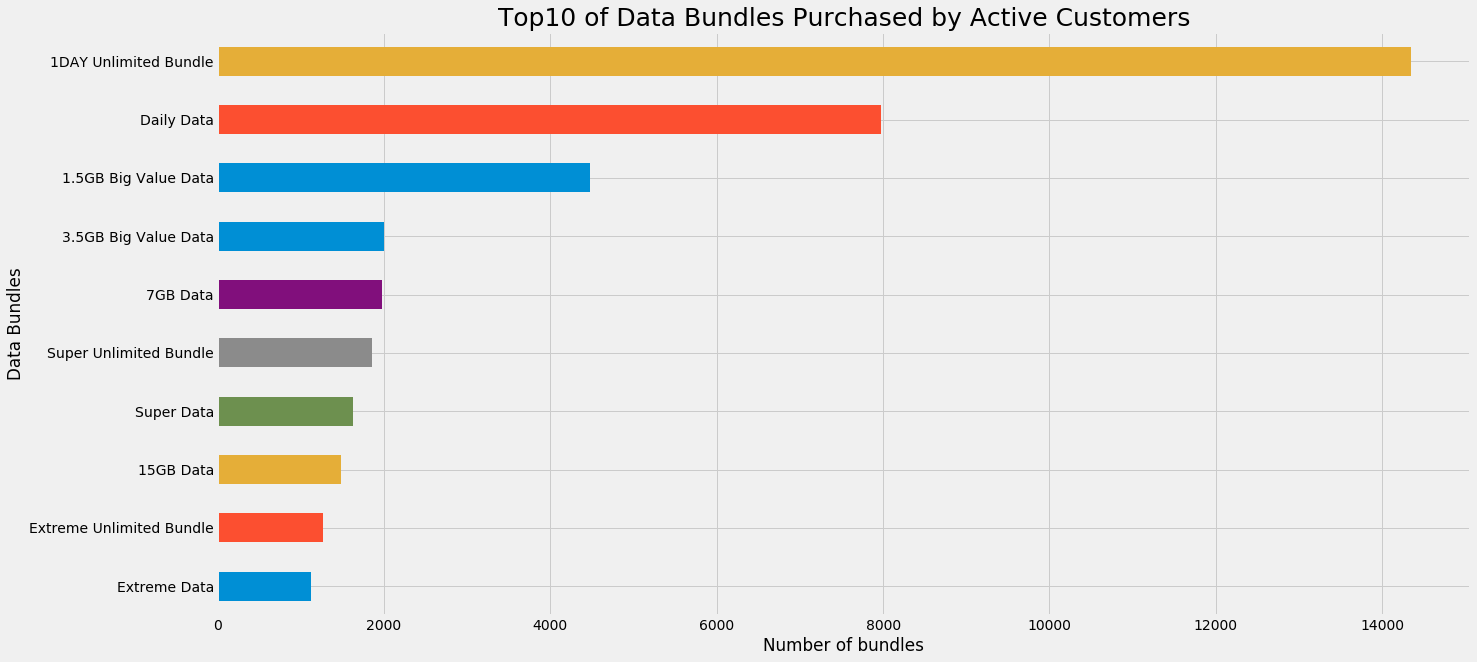

In [32]:
graph2 =Active_purchase_history.OFFER_NAME.value_counts().head(10).sort_values(ascending=True).plot.barh(figsize=(20,10))
plt.title('Top10 of Data Bundles Purchased by Active Customers',size=25)
plt.style.use('fivethirtyeight')
plt.xlabel("Number of bundles")
plt.ylabel('Data Bundles')

From our initial exploration, we realised that the top 10 bundles for our customers who have been active for the past 150 days are:

'1DAY Unlimited Bundle', 

'Daily Data', 

'1.5GB Big Value Data',

'3.5GB Big Value Data', 

'7GB Data', 

'Super Unlimited Bundle',

'Super Data', 

'15GB Data', 

'Extreme Unlimited Bundle', 

'Extreme Data'

1DAY Unlimited Bundle according to the team has been decapitated due to technical issues.

This will let us understand the trend.

We need to check if these bundle purchase has anything to do with the day of purchase and time. Let's explore more.


In [33]:
(Active_purchase_history.groupby('OFFER_NAME')['PRICE'].sum()).sort_values(ascending=False)

OFFER_NAME
Extreme Unlimited Bundle         394320.0
Extreme Data                     346890.0
1DAY Unlimited Bundle            172080.0
Super Unlimited Bundle           152028.0
Super Data                       133742.0
15GB Data                        110925.0
40GB Data                        105400.0
Daily Data                        95760.0
Supreme Unlimited Bundle          79695.0
7GB Data                          79160.0
Supreme Data                      64845.0
180GB Data                        52325.0
3.5GB Big Value Data              40100.0
1.5GB Big Value Data              35776.0
15GB Loyalty Bundle               31350.0
7.5GB Big Value Data              29080.0
3GB Data                          24690.0
230GB Data                        24650.0
7GB Loyalty Bundle                19120.0
5.5GB Big Value Data              18900.0
Sankofa 40GB Data                 18785.0
Weekend Unlimited Bundle          18780.0
120GB Data                        14850.0
Sankofa 230GB Data     

In [34]:
(Active_purchase_history.groupby('OFFER_NAME')['PRICE'].sum()).sort_values(ascending=False).head(10)

OFFER_NAME
Extreme Unlimited Bundle    394320.0
Extreme Data                346890.0
1DAY Unlimited Bundle       172080.0
Super Unlimited Bundle      152028.0
Super Data                  133742.0
15GB Data                   110925.0
40GB Data                   105400.0
Daily Data                   95760.0
Supreme Unlimited Bundle     79695.0
7GB Data                     79160.0
Name: PRICE, dtype: float64

Text(0.5,1,'Bundles Vrs Revenue Generated')

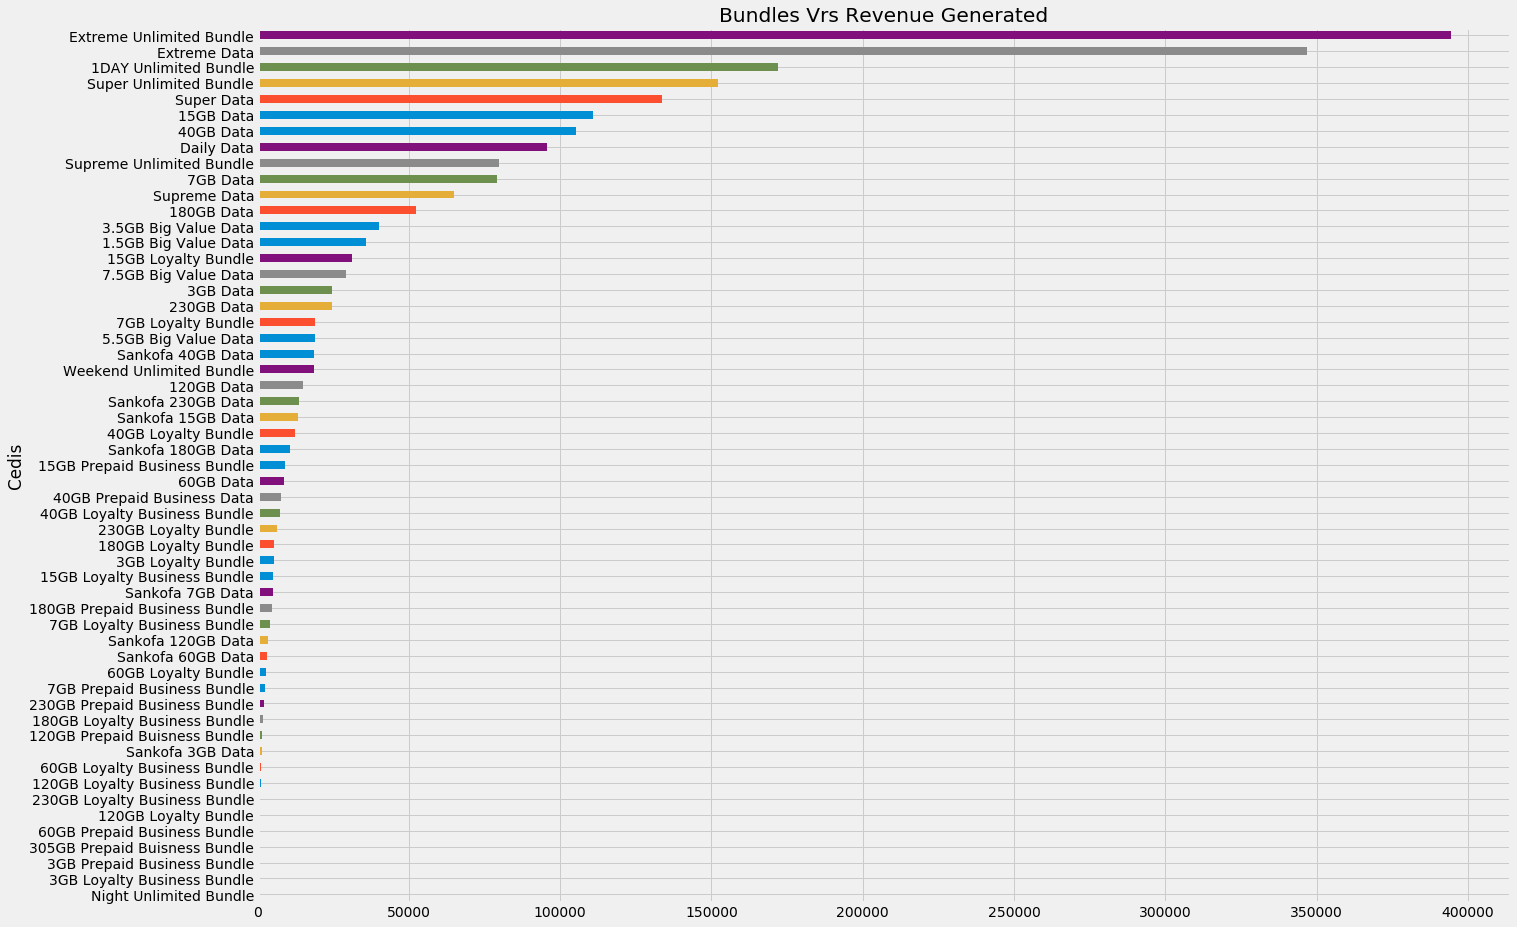

In [35]:
graph2=(Active_purchase_history.groupby('OFFER_NAME')['PRICE'].sum()).sort_values(ascending=True).plot.barh(figsize=(20,15))
plt.ylabel("Cedis")
plt.title('Bundles Vrs Revenue Generated')
#plt.xlim(0,190000.0)

In [36]:
(Active_purchase_history.groupby('OFFER_NAME')['PRICE'].sum()).sort_values(ascending=False).head(10)

OFFER_NAME
Extreme Unlimited Bundle    394320.0
Extreme Data                346890.0
1DAY Unlimited Bundle       172080.0
Super Unlimited Bundle      152028.0
Super Data                  133742.0
15GB Data                   110925.0
40GB Data                   105400.0
Daily Data                   95760.0
Supreme Unlimited Bundle     79695.0
7GB Data                     79160.0
Name: PRICE, dtype: float64

Text(0.5,1,'Top 10 Bundles Active_Subs Vrs Revenue Generated')

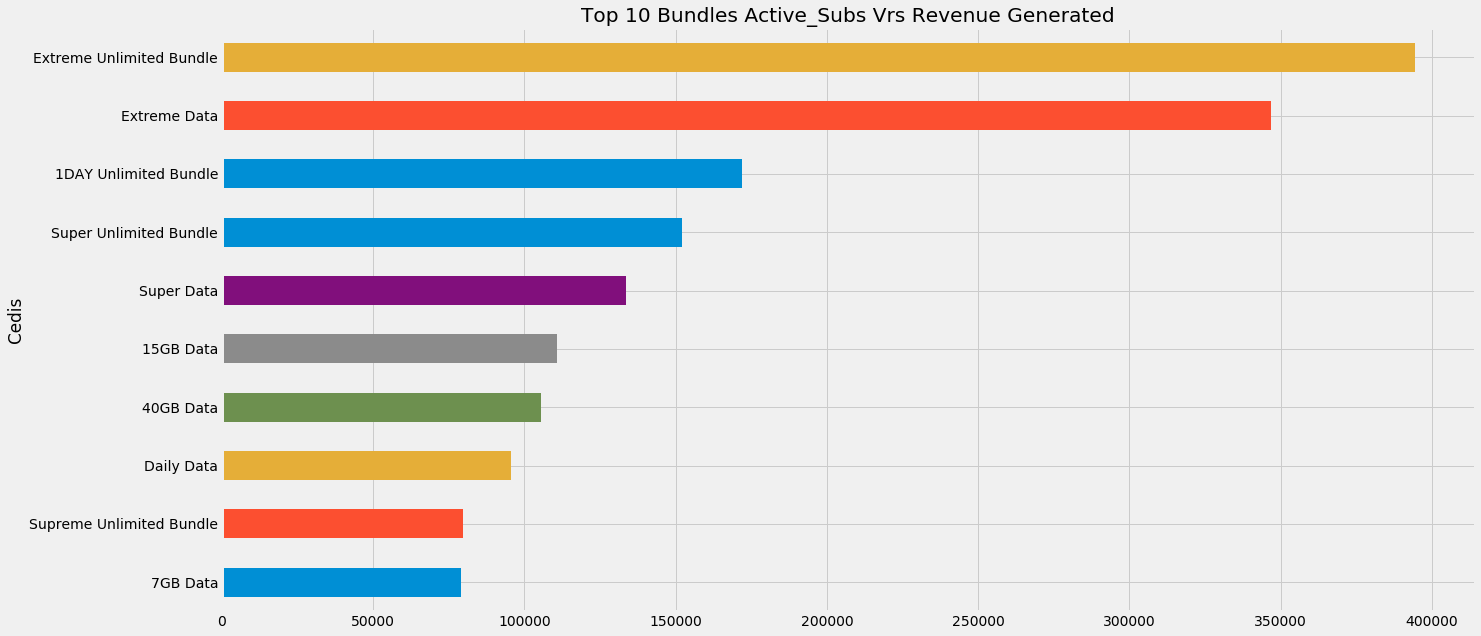

In [37]:
graph2=(Active_purchase_history.groupby('OFFER_NAME')['PRICE'].sum()).sort_values(ascending=True).tail(10).plot.barh(figsize=(20,10))
plt.ylabel("Cedis")
plt.title('Top 10 Bundles Active_Subs Vrs Revenue Generated')
#plt.xlim(0,190000.0)

In [38]:
Active_purchase_history['Weekday_name'].value_counts()

Wednesday    6995
Tuesday      6874
Thursday     6793
Friday       6557
Monday       6518
Saturday     6500
Sunday       5681
Name: Weekday_name, dtype: int64

Text(0.5,1,'Days Active Subs have Purchased Bundles')

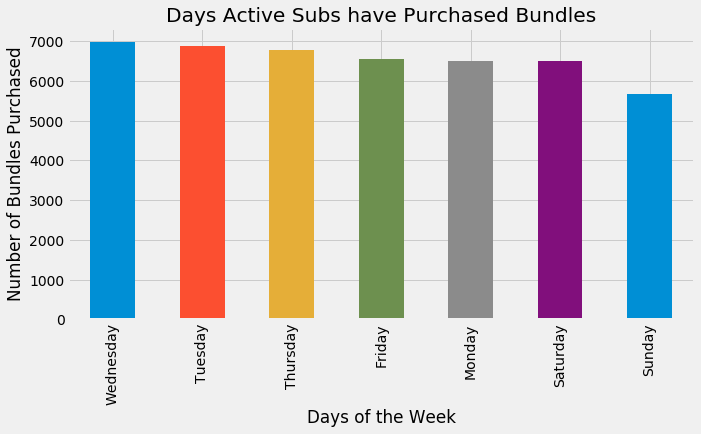

In [39]:
graph3=Active_purchase_history['Weekday_name'].value_counts().sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('Days of the Week')
plt.ylabel('Number of Bundles Purchased')
plt.title('Days Active Subs have Purchased Bundles')

So we decided to rearrange the graphs and have them in order


Text(0.5,1,'Days Active Subs have Purchased Bundles')

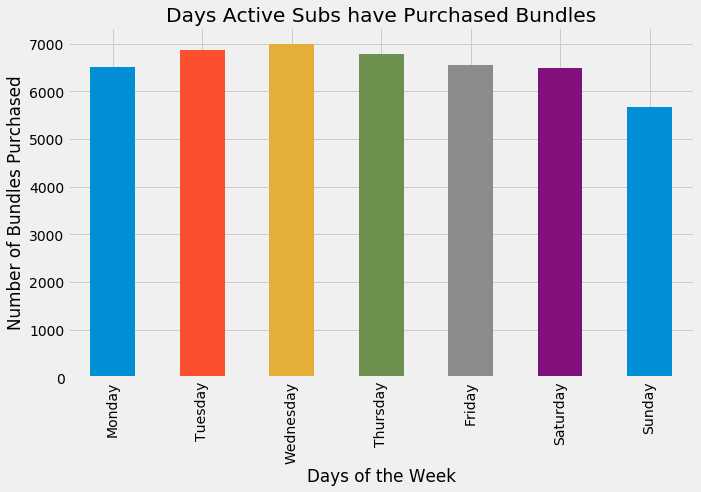

In [40]:
field = "Day"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = Active_purchase_history['Weekday_name'].value_counts().reindex(day_order).loc[day_order].plot(kind="bar", legend=False,figsize=(10,6))
plt.xlabel('Days of the Week')
plt.ylabel('Number of Bundles Purchased')
plt.title('Days Active Subs have Purchased Bundles')
#ax.set_ylabel("Value")

Now we want to see what exact bundles these guys purchased.

As it might help the team known which bundles to adverise on which day.

We will then go deep and check the time.

In [41]:
Days_n_Bundle=Active_purchase_history.pivot_table(index='OFFER_NAME',columns='Weekday_name',aggfunc='size').fillna(0)

In [42]:
Days_n_Bundle

Weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
OFFER_NAME,,,,,,,
1.5GB Big Value Data,674.0,605.0,561.0,619.0,698.0,670.0,645.0
120GB Data,7.0,11.0,7.0,9.0,10.0,2.0,8.0
120GB Loyalty Bundle,0.0,1.0,0.0,0.0,1.0,1.0,0.0
120GB Loyalty Business Bundle,1.0,1.0,1.0,0.0,0.0,0.0,1.0
120GB Prepaid Buisness Bundle,1.0,0.0,2.0,0.0,3.0,0.0,0.0
15GB Data,221.0,205.0,218.0,137.0,226.0,243.0,229.0
15GB Loyalty Bundle,55.0,63.0,51.0,55.0,56.0,71.0,67.0
15GB Loyalty Business Bundle,9.0,22.0,9.0,8.0,10.0,9.0,11.0
15GB Prepaid Business Bundle,18.0,13.0,14.0,14.0,18.0,36.0,25.0


Text(0.5,0,'')

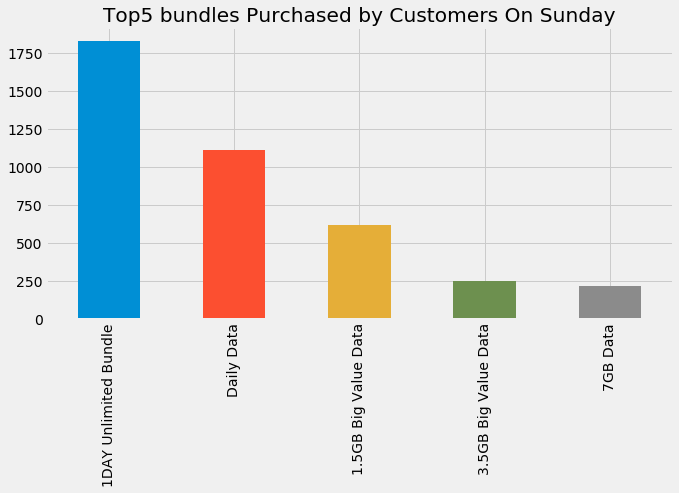

In [43]:
Days_n_Bundle['Sunday'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.title('Top5 bundles Purchased by Customers On Sunday')
plt.xlabel('')

Text(0.5,0,'')

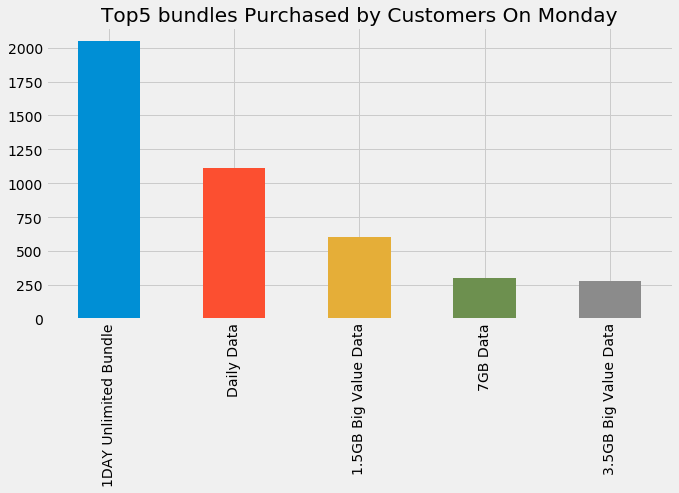

In [44]:
Days_n_Bundle['Monday'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.title('Top5 bundles Purchased by Customers On Monday')
plt.xlabel('')

Text(0.5,0,'')

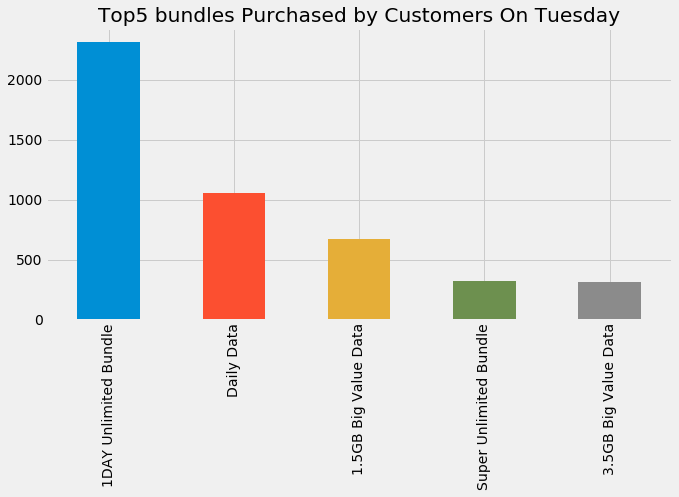

In [45]:
Days_n_Bundle['Tuesday'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.title('Top5 bundles Purchased by Customers On Tuesday')
plt.xlabel('')

Text(0.5,0,'')

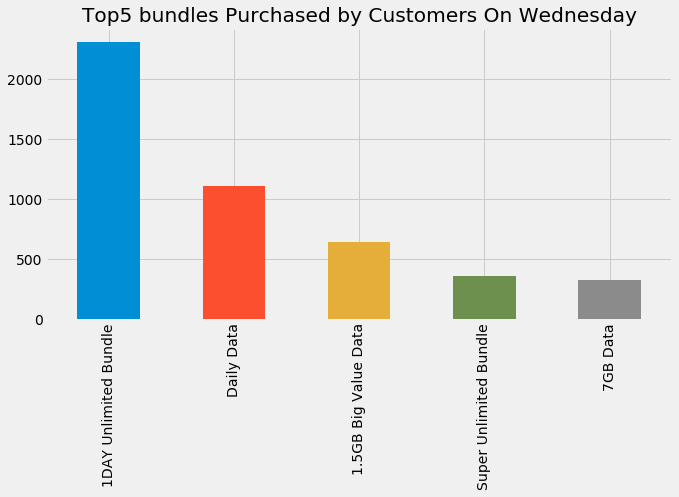

In [46]:
Days_n_Bundle['Wednesday'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.title('Top5 bundles Purchased by Customers On Wednesday')
plt.xlabel('')

Text(0.5,0,'')

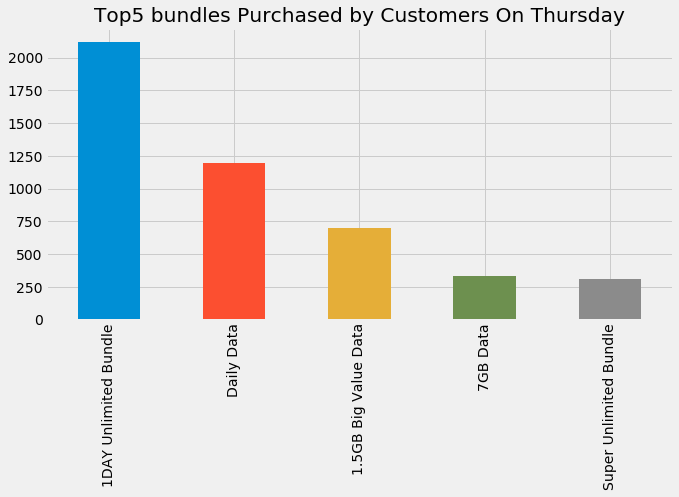

In [47]:
Days_n_Bundle['Thursday'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.title('Top5 bundles Purchased by Customers On Thursday')
plt.xlabel('')

Text(0.5,0,'')

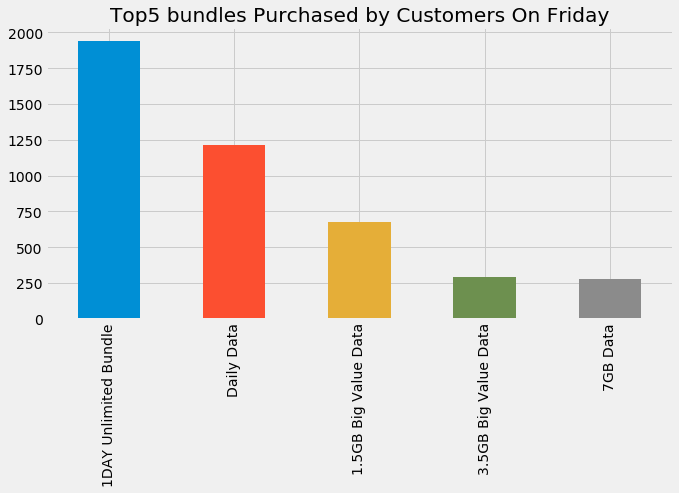

In [48]:
Days_n_Bundle['Friday'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.title('Top5 bundles Purchased by Customers On Friday')
plt.xlabel('')

Text(0.5,0,'')

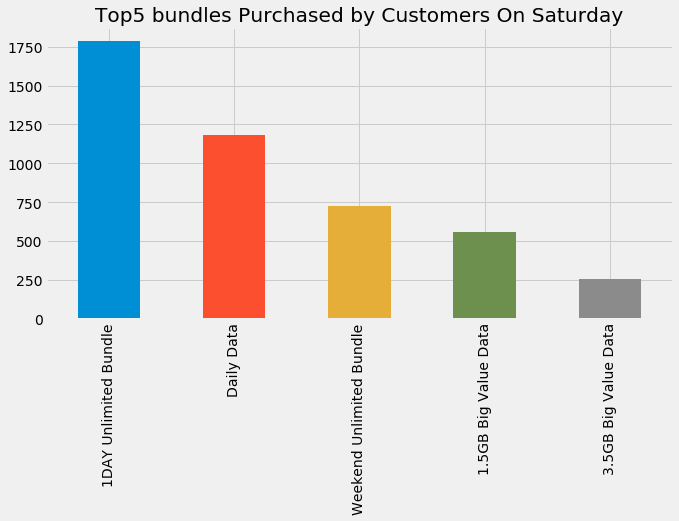

In [49]:
Days_n_Bundle['Saturday'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.title('Top5 bundles Purchased by Customers On Saturday')
plt.xlabel('')

From our exploration and Analysis, the top 3 Bundles for Purchased daily are:

1. 1Day Unlimited(not online for now)
2. Daily Data
3. 1.5GB Big Value Data

So one will ask why is Extreme Data giving us more revenue but less count?

From my business knowledge due to network instability, customers do not want to commit to long term bundles.

We can go ahead and check the counts for bundle purchase month on month

We will realise that the months we had issues we had less purchase of unlimited the following months.

Also customers like to be in controll of their data usage and purchase hence this behavior.



In [50]:
Active_purchase_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45918 entries, 748659 to 637479
Data columns (total 11 columns):
ACC_NBR           45918 non-null object
PRICE             45918 non-null float64
PHONE_NUMBER      45859 non-null object
OFFER_NAME        45918 non-null object
PURCHASE_DATE     45918 non-null datetime64[ns]
DETAILS           45918 non-null object
DATE              45918 non-null datetime64[ns]
TIME              45918 non-null object
Weekday_name      45918 non-null object
Num_Churn_Days    45918 non-null int32
Churn             45918 non-null object
dtypes: datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 4.0+ MB


In [51]:
Active_purchase_history['Hour']=Active_purchase_history['PURCHASE_DATE'].dt.hour

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
Active_purchase_history.head()

,ACC_NBR,PRICE,PHONE_NUMBER,OFFER_NAME,PURCHASE_DATE,DETAILS,DATE,TIME,Weekday_name,Num_Churn_Days,Churn,Hour
748659,117474,8.0,0247588620,1.5GB Big Value Data,2022-01-17 17:53:42,Consumer,2022-01-17,17:53:42,Monday,2,No,17
748658,128413,40.0,05660156323,7.5GB Big Value Data,2022-01-17 17:46:54,Consumer,2022-01-17,17:46:54,Monday,2,No,17
427630,186652,8.0,0244772357,1.5GB Big Value Data,2022-01-17 17:42:52,Consumer,2022-01-17,17:42:52,Monday,2,No,17
641585,118605,82.0,0244178780,Super Data,2022-01-17 17:26:41,Consumer,2022-01-17,17:26:41,Monday,2,No,17
213027,109187,8.0,0230351531,1.5GB Big Value Data,2022-01-17 17:25:43,Consumer,2022-01-17,17:25:43,Monday,2,No,17


In [53]:
Active_purchase_history['Hour']=Active_purchase_history['Hour'].astype(int)

C:\Users\287910031\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
Active_purchase_history.pivot_table(index=['Weekday_name','OFFER_NAME'],columns='Hour',aggfunc='size').fillna(0)

Hour                                          0     1    2    3     4     5   \
Weekday_name OFFER_NAME                                                        
Friday       1.5GB Big Value Data            9.0   5.0  7.0  2.0   3.0   7.0   
             120GB Data                      0.0   1.0  0.0  0.0   0.0   0.0   
             120GB Loyalty Business Bundle   0.0   0.0  0.0  0.0   0.0   0.0   
             120GB Prepaid Buisness Bundle   0.0   0.0  0.0  0.0   0.0   0.0   
             15GB Data                       4.0   2.0  0.0  1.0   0.0   4.0   
             15GB Loyalty Bundle             0.0   1.0  0.0  2.0   0.0   2.0   
             15GB Loyalty Business Bundle    0.0   0.0  0.0  0.0   0.0   0.0   
             15GB Prepaid Business Bundle    0.0   0.0  0.0  0.0   0.0   0.0   
             180GB Data                      0.0   0.0  0.0  0.0   0.0   0.0   
             180GB Loyalty Bundle            0.0   0.0  0.0  0.0   0.0   0.0   
             1DAY Unlimited Bundle          43.0  27.0  8.0  8.0  17.0  11.0   
             230GB Data                      0.0   0.0  0.0  0.0   0.0   0.0   
             3.5GB Big Value Data            1.0   4.0  0.0  1.0   2.0   8.0   
             3GB Data                        1.0   2.0  1.0  1.0   2.0   3.0   
             3GB Loyalty Bundle              1.0   1.0  0.0  0.0   0.0   2.0   
             3GB Prepaid Business Bundle     1.0   0.0  0.0  0.0   0.0   0.0   
             40GB Data                       1.0   1.0  0.0  0.0   1.0   0.0   
             40GB Loyalty Bundle             0.0   0.0  0.0  0.0   0.0   1.0   
             40GB Loyalty Business Bundle    0.0   0.0  0.0  0.0   0.0   1.0   
             40GB Prepaid Business Data      0.0   0.0  0.0  0.0   0.0   0.0   
             5.5GB Big Value Data            1.0   2.0  1.0  0.0   1.0   1.0   
             60GB Data                       0.0   0.0  0.0  0.0   0.0   0.0   
             60GB Loyalty Bundle             1.0   0.0  0.0  0.0   0.0   0.0   
             7.5GB Big Value Data            2.0   2.0  1.0  1.0   0.0   1.0   
             7GB Data                        4.0   2.0  2.0  0.0   3.0   2.0   
             7GB Loyalty Bundle              0.0   0.0  0.0  0.0   0.0   2.0   
             7GB Loyalty Business Bundle     0.0   0.0  0.0  0.0   0.0   0.0   
             7GB Prepaid Business Bundle     0.0   0.0  0.0  0.0   0.0   0.0   
             Daily Data                     30.0  11.0  5.0  4.0   4.0   9.0   
             Extreme Data                    0.0   1.0  0.0  2.0   0.0   2.0   
...                                          ...   ...  ...  ...   ...   ...   
Wednesday    3GB Prepaid Business Bundle     0.0   0.0  0.0  0.0   0.0   0.0   
             40GB Data                       3.0   0.0  1.0  0.0   0.0   3.0   
             40GB Loyalty Bundle             0.0   1.0  0.0  0.0   0.0   0.0   
             40GB Loyalty Business Bundle    0.0   0.0  0.0  0.0   0.0   0.0   
             40GB Prepaid Business Data      0.0   0.0  0.0  0.0   0.0   0.0   
             5.5GB Big Value Data            3.0   4.0  0.0  0.0   0.0   1.0   
             60GB Data                       0.0   0.0  0.0  0.0   0.0   0.0   
             60GB Loyalty Bundle             0.0   0.0  0.0  0.0   0.0   0.0   
             60GB Loyalty Business Bundle    0.0   0.0  0.0  0.0   0.0   0.0   
             7.5GB Big Value Data            1.0   0.0  1.0  0.0   0.0   0.0   
             7GB Data                        5.0   2.0  1.0  1.0   1.0   3.0   
             7GB Loyalty Bundle              2.0   1.0  0.0  0.0   0.0   1.0   
             7GB Loyalty Business Bundle     0.0   0.0  0.0  0.0   0.0   0.0   
             7GB Prepaid Business Bundle     0.0   0.0  0.0  0.0   0.0   0.0   
             Daily Data                     19.0  12.0  7.0  4.0   4.0   9.0   
             Extreme Data                    1.0   1.0  0.0  0.0   0.0   1.0   
             Extreme Unlimited Bundle        2.0   1.0  0.0  1.0   1.0   2.0   


In [55]:
Active_purchase_history['Hour'].value_counts()

10    2947
20    2931
19    2851
21    2848
12    2789
18    2771
9     2706
11    2626
13    2494
17    2473
15    2472
16    2470
14    2383
22    2223
8     2196
7     1500
23    1468
0     1019
6      961
5      524
1      469
4      294
2      285
3      218
Name: Hour, dtype: int64

Text(0.5,0,'Hours24')

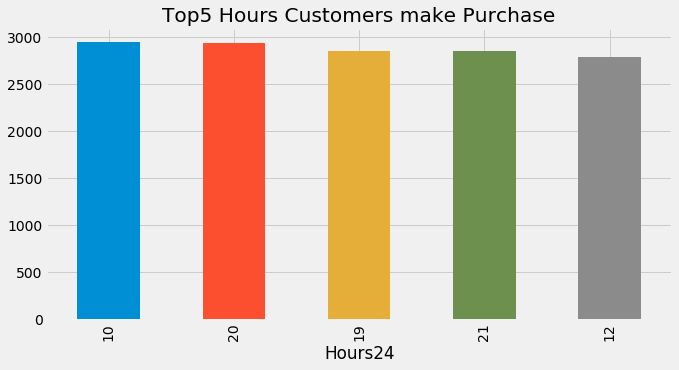

In [56]:
Active_purchase_history['Hour'].value_counts().sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.title('Top5 Hours Customers make Purchase')
plt.xlabel('Hours24')

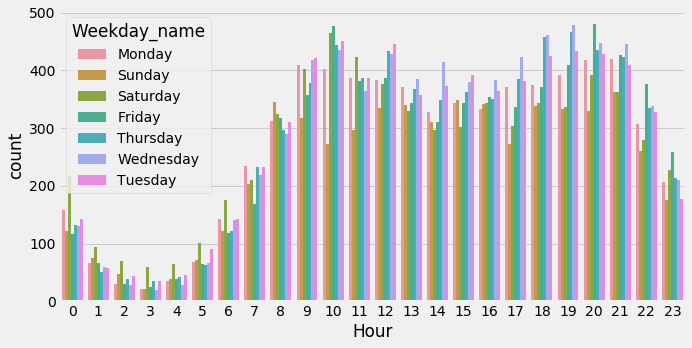

In [57]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=Active_purchase_history,x='Hour',hue='Weekday_name')

# First Conclusion

We saw that the top 3 bundles active customers purchased were:

1. 1DAY Unlimited Bundle    --   14340
2. Daily Data               --   7980
3. 1.5GB Big Value Data     --   4472

The percentage of churn is not a true reflection. As it contains duplicate purchase.

For a true reflection, we need the latest purchase of clients.

Also we also saw that our top 3 days customers make purchase are:

1. Wednesday    6995
2. Tuesday      6874
3. Thursday     6793

Also we realise that the top 3 times cour active customers make purchases are:

1. 10    2947
2. 20    2931
3. 19    2851



This gives the marketing team a clear idea on when to run adverts.

Now the next thing is to do our segmentation 

then do our analysis, then suggest which data bundle should be advertised to these clients and on which days.

# Segmentation

Here we put customers in 3 segements

30_day

90_day

150_day

So the 30_day data contains customers who have not churned and have made purchase over 30 days.

Same explanation for the rest.

When we are done with their analysis, we will delete the duplicated purchases then be left with only the latest purchase for these days.

We need to keep this file and share with stakeholders.

In [58]:
Active_30_day=Active_purchase_history[(Active_purchase_history['Num_Churn_Days']>0)&(Active_purchase_history['Num_Churn_Days'] <=30)]

In [59]:
Active_90_day=Active_purchase_history[(Active_purchase_history['Num_Churn_Days']>30)&(Active_purchase_history['Num_Churn_Days'] <=90)]

In [60]:
Active_150_day=Active_purchase_history[(Active_purchase_history['Num_Churn_Days']>90)&(Active_purchase_history['Num_Churn_Days'] <=150)]

# Active_30

Now lets see

1. What is the data these people purchase most

2. What day do they purchase most

3. What time

Then we can decid to suggest bundles which should be advertised for these guys and at what time.



In [61]:
#lets see the average amount spent by these people

In [62]:
Active_30_day['PRICE'].mean()

51.52442248017469

For the 30_DAY_ACTIVE customers they spend on an average of 52 Cedis on OUR INTERNET SERVICE

We need to look at how we these customers can spend more.

Lets Explore the bundles they buy and make some suggestion.

In [63]:
Active_30_day['OFFER_NAME'].value_counts()

Daily Data                       3980
1.5GB Big Value Data              878
Super Data                        725
7GB Data                          617
15GB Data                         477
Extreme Data                      476
3.5GB Big Value Data              431
3GB Data                          244
40GB Data                         199
7.5GB Big Value Data              185
Supreme Data                      178
5.5GB Big Value Data              127
180GB Data                         48
15GB Prepaid Business Bundle       28
120GB Data                         19
Sankofa 40GB Data                  17
60GB Data                          16
230GB Data                         14
7GB Prepaid Business Bundle        12
40GB Prepaid Business Data         11
Sankofa 15GB Data                   8
180GB Prepaid Business Bundle       4
120GB Prepaid Buisness Bundle       2
3GB Prepaid Business Bundle         2
Sankofa 180GB Data                  1
Sankofa 230GB Data                  1
230GB Prepai

Text(0.5,1,'TOP10 Data Purchased by 30Day Active Subs')

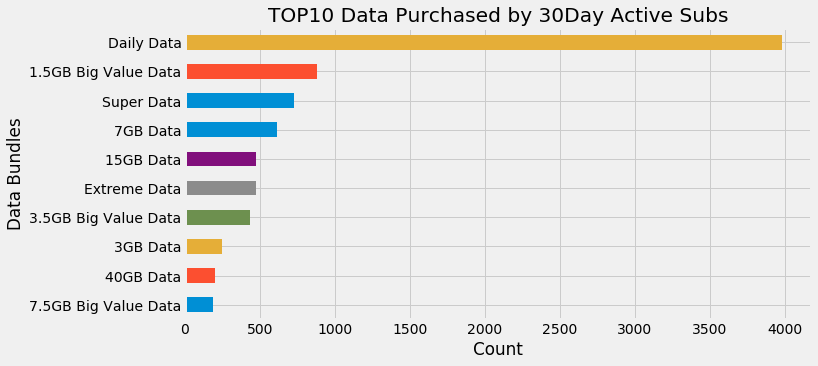

In [64]:
Active_30_day['OFFER_NAME'].value_counts().head(10).sort_values(ascending=True).plot.barh(figsize=(10,5))
plt.xlabel('Count')
plt.ylabel('Data Bundles')
plt.title("TOP10 Data Purchased by 30Day Active Subs")

From our top 10 lets see the days these clients purchase most


In [65]:
top10col=Active_30_day['OFFER_NAME'].value_counts().head(10).index



Lets see the top days customers make purchase 

Then we will put this together and see i we can make a concreate suggestion.



In [66]:
Active_30_day['Weekday_name'].value_counts().sort_values(ascending=False)

Monday       1455
Wednesday    1314
Tuesday      1307
Thursday     1259
Friday       1256
Saturday     1083
Sunday       1027
Name: Weekday_name, dtype: int64

Text(0.5,1,'Days Active Subs have Purchased Bundles')

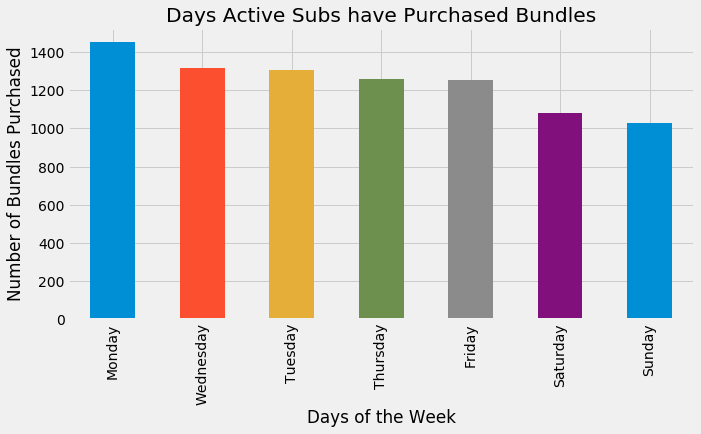

In [67]:
Active_30_day['Weekday_name'].value_counts().sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('Days of the Week')
plt.ylabel('Number of Bundles Purchased')
plt.title('Days Active Subs have Purchased Bundles')

Text(0.5,1,'Days 30 DaysActive Subs have Purchased Bundles')

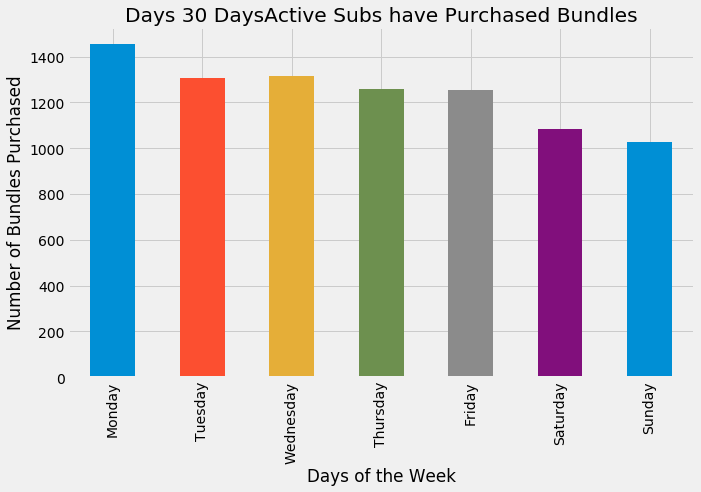

In [68]:
field = "Day"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = Active_30_day['Weekday_name'].value_counts().reindex(day_order).loc[day_order].plot(kind="bar", legend=False,figsize=(10,6))
plt.xlabel('Days of the Week')
plt.ylabel('Number of Bundles Purchased')
plt.title('Days 30 DaysActive Subs have Purchased Bundles')
#ax.set_ylabel("Value")

In [69]:
Active_30_day['Hour'].value_counts().sort_values(ascending=False).head(10)

10    559
21    554
12    551
11    528
19    526
20    525
18    510
9     507
15    497
16    489
Name: Hour, dtype: int64

Text(0.5,1,'Hours 30Day Active Subs Buy')

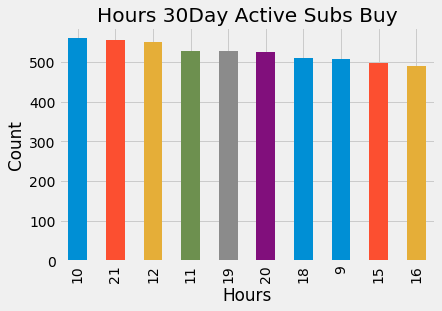

In [70]:
Active_30_day['Hour'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Hours 30Day Active Subs Buy')

Now lets see the revenue these guys give us in 30 days.



In [71]:
total_rev=Active_30_day['PRICE'].sum()

print("total revenue 30days Subs have given us over the last 30 days is {:,} cedis".format(total_rev))

total revenue 30days Subs have given us over the last 30 days is 448,314.0 cedis


In [72]:
Active_30_day['Hour'].value_counts().sort_values(ascending=False).head(10)

10    559
21    554
12    551
11    528
19    526
20    525
18    510
9     507
15    497
16    489
Name: Hour, dtype: int64

Now we want to see which day do most clients purchase, and what exactly are these clients purchasing.

This makes our target marketing easier.

Text(0.5,1,'Top10 Bundles and the Days they are Purchsed Most \n for 30days Subs')

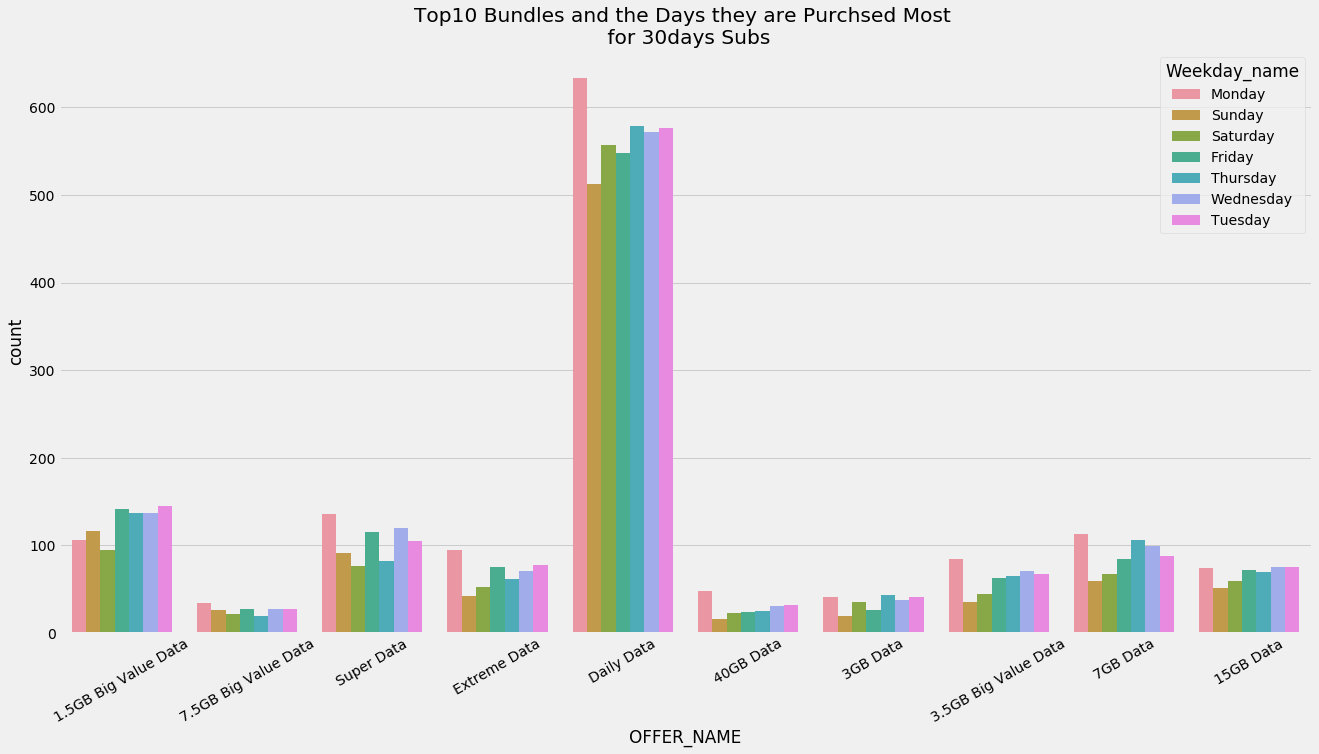

In [73]:
plt.figure(figsize=(20,10))


sns.countplot(data=Active_30_day[Active_30_day['OFFER_NAME'].isin(top10col)][['Weekday_name','OFFER_NAME']],x='OFFER_NAME',hue='Weekday_name')
plt.xticks(rotation=30)
plt.title("Top10 Bundles and the Days they are Purchsed Most \n for 30days Subs")

From our data we explored. We can conclude that for customers who have made purchase over the last 30days,

We suggest we advertise 

1. Daily Data                       
2. 1.5GB Big Value Data              
3. Super Data                        
4. 7GB Data                          
5. 15GB Data

Also do this advertisement on Monday morning before 10am/7pm/8pm/9pm. We realised most customers make data purchase at these times of the day.

Since our customers prefer purchasing small value data for a period of 30 days, We can decide to increase the price a bit of these bundles, and increase the volumes a bit. so  a dailydata which goes for 12 cedis now goes for 15 cedis and customer gets 2days validity wih 80gb data.

Hence increasing our monthly sales.



# Active_90



1. What is the data these people purchase most

2. What day do they purchase most

3. What time

In [74]:
Active_90_day['PRICE'].mean()

50.6527413655534

For the 30_DAY_ACTIVE customers they spend on an average of 51 Cedis on OUR INTERNET SERVICE

We need to look at how we these customers can spend more.

Lets Explore the bundles they buy and make some suggestion.

In [75]:
Active_90_day['OFFER_NAME'].value_counts()

1DAY Unlimited Bundle            4026
Daily Data                       4000
1.5GB Big Value Data             1880
7GB Data                         1101
Super Data                        906
3.5GB Big Value Data              904
15GB Data                         796
Extreme Data                      643
Super Unlimited Bundle            566
3GB Data                          421
Extreme Unlimited Bundle          371
40GB Data                         352
Weekend Unlimited Bundle          321
7.5GB Big Value Data              321
5.5GB Big Value Data              244
Supreme Data                      215
Supreme Unlimited Bundle          147
180GB Data                         88
15GB Prepaid Business Bundle       62
120GB Data                         29
7GB Prepaid Business Bundle        29
230GB Data                         27
Sankofa 40GB Data                  25
40GB Prepaid Business Data         20
60GB Data                          14
Sankofa 15GB Data                  12
180GB Prepai

Text(0.5,1,'TOP10 Data Purchased by 90Day Active Subs')

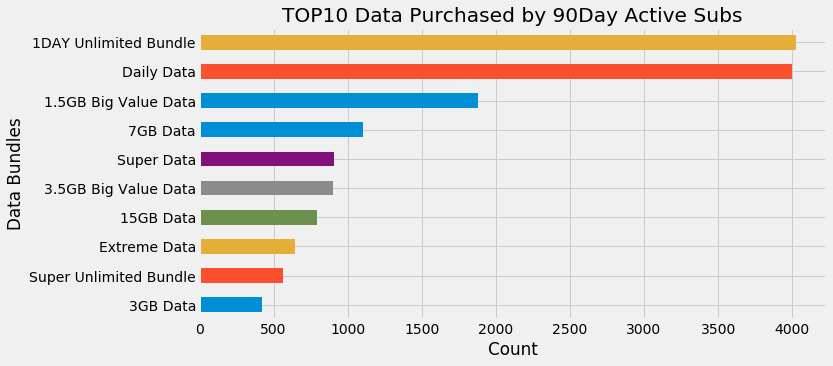

In [76]:
Active_90_day['OFFER_NAME'].value_counts().head(10).sort_values(ascending=True).plot.barh(figsize=(10,5))
plt.xlabel('Count')
plt.ylabel('Data Bundles')
plt.title("TOP10 Data Purchased by 90Day Active Subs")

In [77]:
top10_90=Active_90_day['OFFER_NAME'].value_counts().head(10).index

In [78]:
Active_90_day['Weekday_name'].value_counts().sort_values(ascending=False)

Thursday     2788
Friday       2756
Saturday     2642
Wednesday    2603
Tuesday      2390
Sunday       2208
Monday       2159
Name: Weekday_name, dtype: int64

Text(0.5,1,'Days 90 DaysActive Subs have Purchased Bundles')

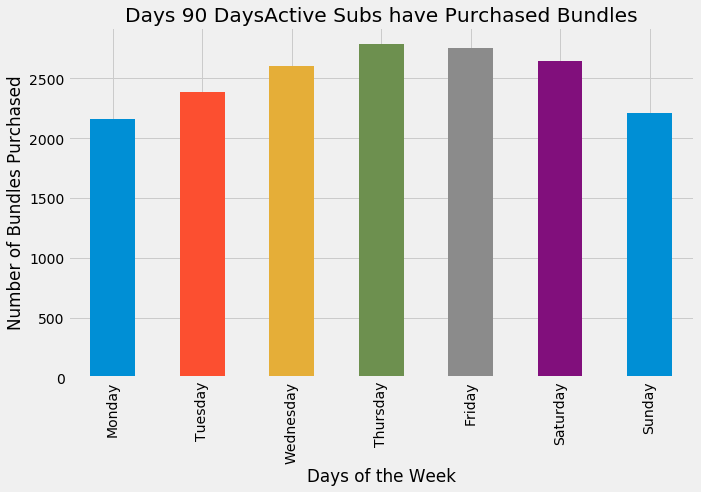

In [79]:
field = "Day"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = Active_90_day['Weekday_name'].value_counts().reindex(day_order).loc[day_order].plot(kind="bar", legend=False,figsize=(10,6))
plt.xlabel('Days of the Week')
plt.ylabel('Number of Bundles Purchased')
plt.title('Days 90 DaysActive Subs have Purchased Bundles')
#ax.set_ylabel("Value")

In [80]:
total_rev_90=Active_90_day['PRICE'].sum()

print("total revenue 90days Subs have given us over the last 90 days is {:,} cedis".format(total_rev_90))

total revenue 90days Subs have given us over the last 90 days is 888,753.0 cedis


Text(0.5,1,'Hours 90Day Active Subs Buy')

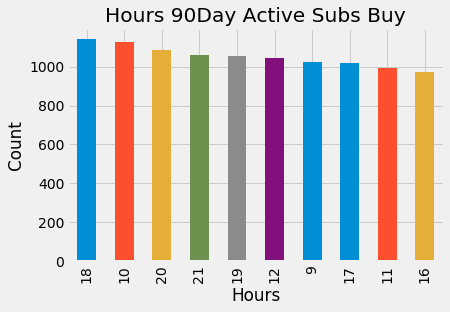

In [81]:
Active_90_day['Hour'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Hours 90Day Active Subs Buy')

In [82]:
Active_90_day['Hour'].value_counts().sort_values(ascending=False).head(10)

18    1140
10    1124
20    1084
21    1058
19    1053
12    1044
9     1021
17    1016
11     995
16     974
Name: Hour, dtype: int64

Text(0.5,1,'Top10 Bundles and the Days they are Purchsed Most \n for 30days Subs')

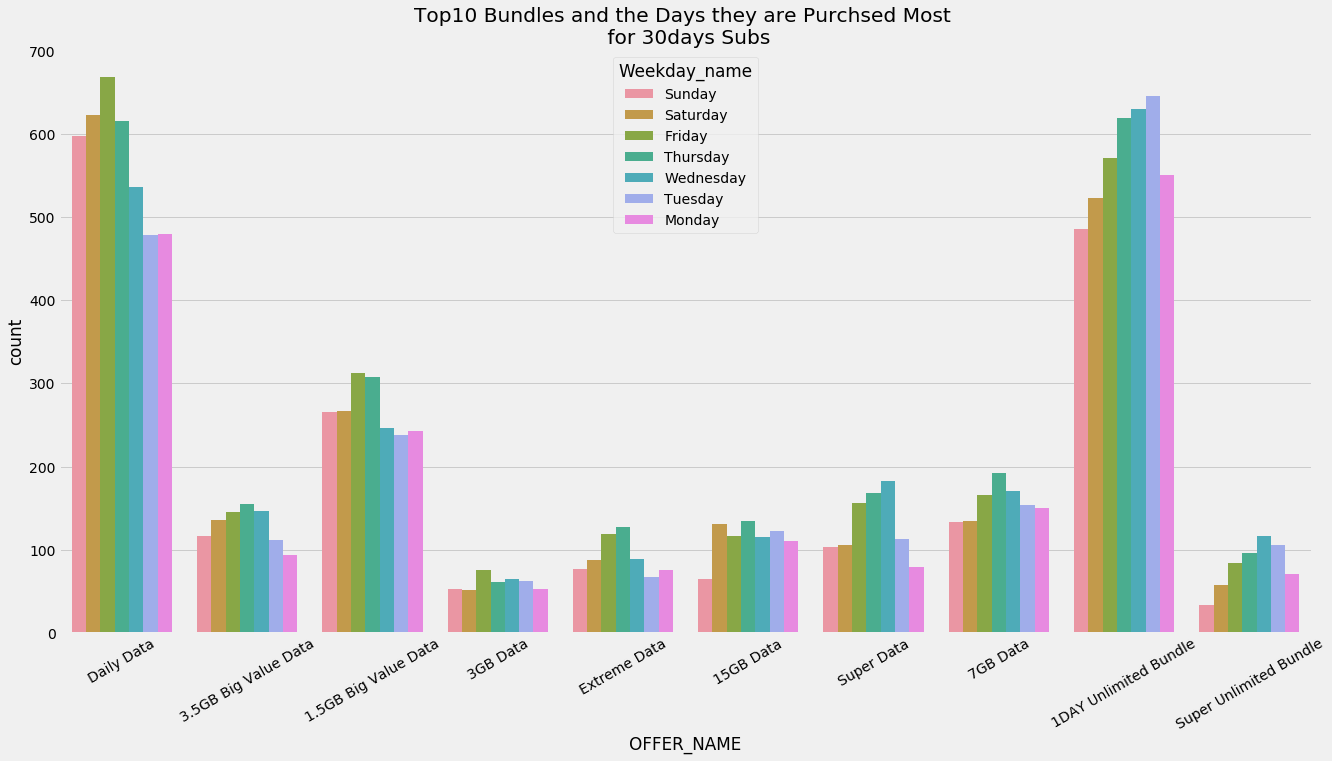

In [83]:
plt.figure(figsize=(20,10))


sns.countplot(data=Active_90_day[Active_90_day['OFFER_NAME'].isin(top10_90)][['Weekday_name','OFFER_NAME']],x='OFFER_NAME',hue='Weekday_name')
plt.xticks(rotation=30)
plt.title("Top10 Bundles and the Days they are Purchsed Most \n for 30days Subs")

From our data we explored. We can conclude that for customers who have made purchase over the last 90days,

We suggest we advertise 
Medium to Large Data also we should bear in mind customers with low value data continue to do well

1. Daily Data                       
2. 1.5GB Big Value Data              
3. 1DAY Unlimited Bundle
4. 7GB DATA
5. Super Data
6. 15GB Data
7. Extreme Data

Also do this advertisement on Thursday and Friday morning before 6pm/8pm/9pm. We realised most customers make data purchase at these times of the day.



# Active_150
What is the data these people purchase most

What day do they purchase most

What time

In [84]:
Active_150_day['PRICE'].mean()

44.22454374459865

For the 150_DAY_ACTIVE customers they spend on an average of 44 Cedis on OUR INTERNET SERVICE

We need to look at how we these customers can spend more.

Lets Explore the bundles they buy and make some suggestion.

In [85]:
Active_150_day['OFFER_NAME'].value_counts()

1DAY Unlimited Bundle            10314
1.5GB Big Value Data              1714
Super Unlimited Bundle            1288
Extreme Unlimited Bundle           901
3.5GB Big Value Data               670
Weekend Unlimited Bundle           618
7GB Loyalty Bundle                 478
15GB Loyalty Bundle                418
Supreme Unlimited Bundle           336
Sankofa 15GB Data                  310
7GB Data                           261
5.5GB Big Value Data               259
7.5GB Big Value Data               221
15GB Data                          206
Sankofa 7GB Data                   199
Sankofa 40GB Data                  179
3GB Loyalty Bundle                 178
3GB Data                           158
40GB Data                          129
7GB Loyalty Business Bundle        121
Sankofa 3GB Data                    88
40GB Loyalty Bundle                 79
15GB Loyalty Business Bundle        78
40GB Loyalty Business Bundle        57
Sankofa 230GB Data                  55
Sankofa 180GB Data       

Text(0.5,1,'TOP10 Data Purchased by 150Day Active Subs')

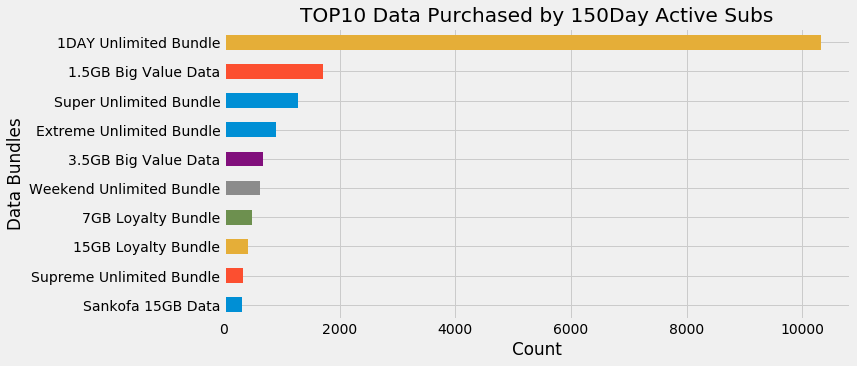

In [108]:
Active_150_day['OFFER_NAME'].value_counts().head(10).sort_values(ascending=True).plot.barh(figsize=(10,5))
plt.xlabel('Count')
plt.ylabel('Data Bundles')
plt.title("TOP10 Data Purchased by 150Day Active Subs")

In [106]:
top10_150=Active_150_day['OFFER_NAME'].value_counts().head(10).index

In [107]:
Active_150_day['Weekday_name'].value_counts().sort_values(ascending=False)

Tuesday      3177
Wednesday    3078
Monday       2904
Saturday     2775
Thursday     2746
Friday       2545
Sunday       2446
Name: Weekday_name, dtype: int64

Text(0.5,1,'Days 150 DaysActive Subs have Purchased Bundles')

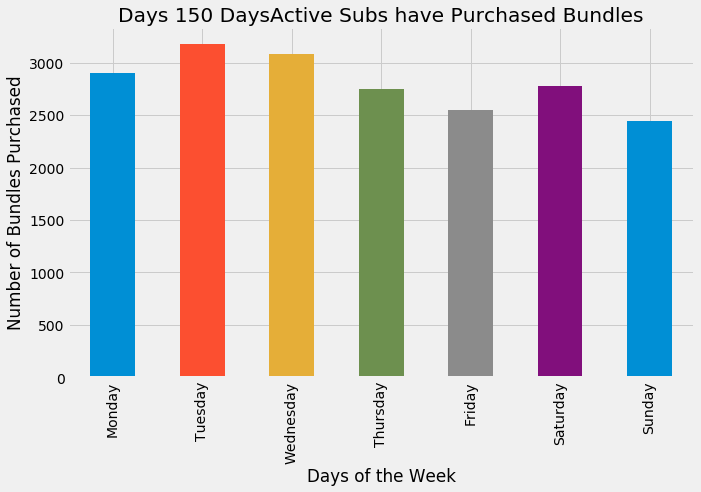

In [109]:
field = "Day"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = Active_150_day['Weekday_name'].value_counts().reindex(day_order).loc[day_order].plot(kind="bar", legend=False,figsize=(10,6))
plt.xlabel('Days of the Week')
plt.ylabel('Number of Bundles Purchased')
plt.title('Days 150 DaysActive Subs have Purchased Bundles')
#ax.set_ylabel("Value")

In [111]:
total_rev_150=Active_150_day['PRICE'].sum()

print("total revenue 90days Subs have given us over the last 150 days is {:,} cedis".format(total_rev_150))

total revenue 90days Subs have given us over the last 150 days is 869,941.0 cedis


Text(0.5,1,'Hours 150Day Active Subs Buy')

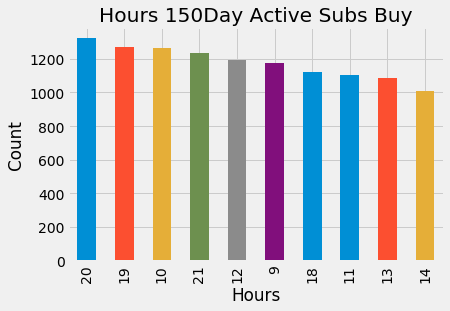

In [112]:
Active_150_day['Hour'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Hours 150Day Active Subs Buy')

Text(0.5,1,'Top10 Bundles and the Days they are Purchsed Most \n for 150days Subs')

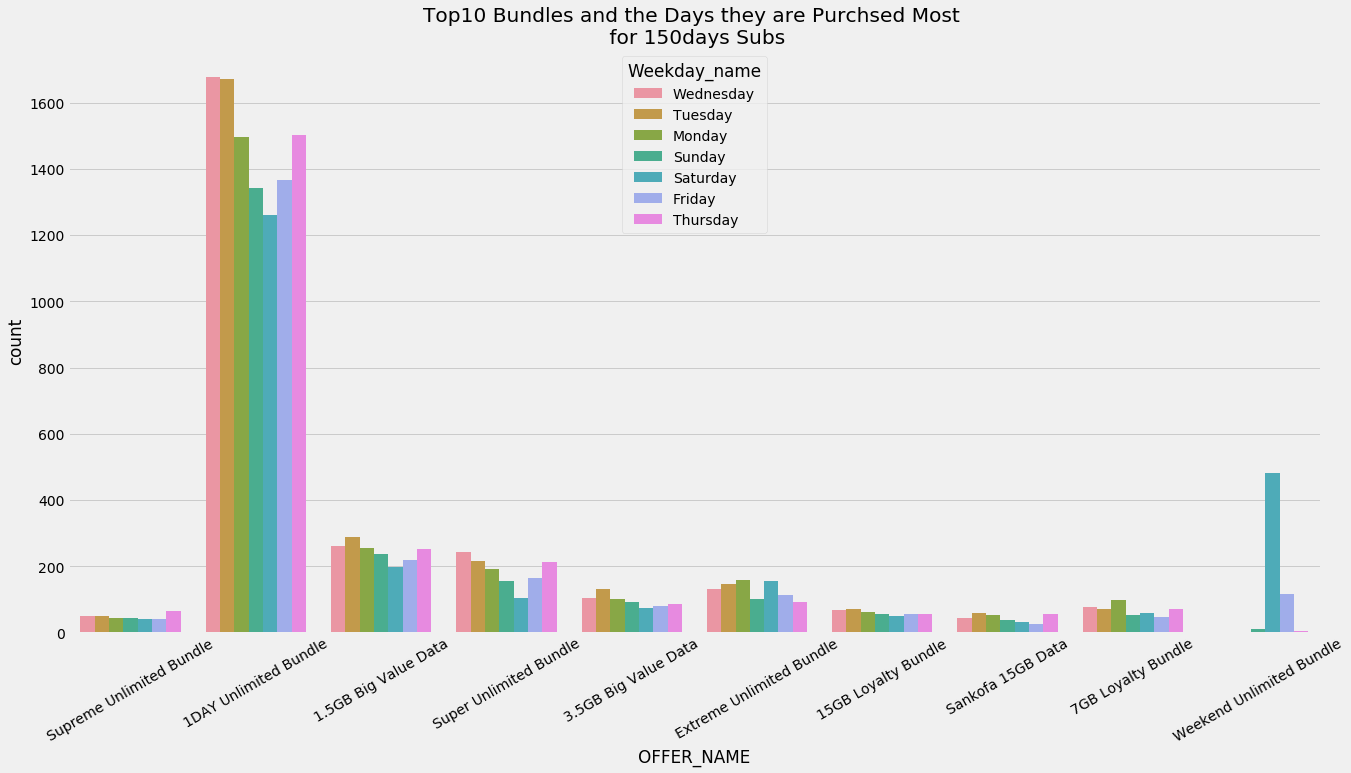

In [113]:
plt.figure(figsize=(20,10))


sns.countplot(data=Active_150_day[Active_150_day['OFFER_NAME'].isin(top10_150)][['Weekday_name','OFFER_NAME']],x='OFFER_NAME',hue='Weekday_name')
plt.xticks(rotation=30)
plt.title("Top10 Bundles and the Days they are Purchsed Most \n for 150days Subs")

From our data we explored. We can conclude that for customers who have made purchase over the last 150days,

We suggest we advertise Medium to Large Data also we should bear in mind customers with low value data continue to do well


1.5GB Big Value Data
1DAY Unlimited Bundle
Super Unlimited
Extreme Unlimited

Also do this advertisement before Tuesday,Wednesay,Saturday

I advice we advertise BIG VALUE bundle to these clients as they are almost about to churn

And we want to convice customer.

In [114]:
Purchase_History.head()

,ACC_NBR,PRICE,PHONE_NUMBER,OFFER_NAME,PURCHASE_DATE,DETAILS,DATE,TIME,Weekday_name,Num_Churn_Days,Churn
748659,117474,8.0,0247588620,1.5GB Big Value Data,2022-01-17 17:53:42,Consumer,2022-01-17,17:53:42,Monday,2,No
748658,128413,40.0,05660156323,7.5GB Big Value Data,2022-01-17 17:46:54,Consumer,2022-01-17,17:46:54,Monday,2,No
427630,186652,8.0,0244772357,1.5GB Big Value Data,2022-01-17 17:42:52,Consumer,2022-01-17,17:42:52,Monday,2,No
641585,118605,82.0,0244178780,Super Data,2022-01-17 17:26:41,Consumer,2022-01-17,17:26:41,Monday,2,No
213027,109187,8.0,0230351531,1.5GB Big Value Data,2022-01-17 17:25:43,Consumer,2022-01-17,17:25:43,Monday,2,No


In [115]:
Latest_Purchase=Purchase_History.drop_duplicates(subset='ACC_NBR',keep='first')

In [ ]:
marks_data.to_excel(file_name)

In [126]:
Latest_Purchase.to_excel('Latest_Purchase.xlsx')

Text(0.5,1,'Churn Vrs No_Chur Percentage')

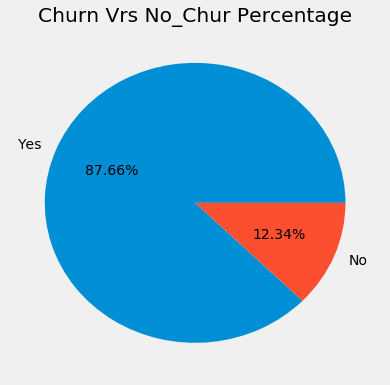

In [116]:
Latest_Purchase['Churn'].value_counts().plot.pie(figsize=(6,6),autopct="%.2f%%")
plt.ylabel("")
plt.title("Churn Vrs No_Chur Percentage")

In [89]:
#Active_Subs=Latest_Purchase[Latest_Purchase['Churn']=='No']

In [118]:
Churn_Subs=Latest_Purchase[Latest_Purchase['Churn']=='Yes']

Now lets explore the Active subs

In [91]:
#Active_Subs.reset_index(inplace=True)

In [92]:
#Active_Subs.head()

1. We are going check what is the most commmon bundle purchased by our active subscribers within the last 5 months

2. We also need to see which Month sales was better

3. We will then explore which particular day and Time had most purchase

In [119]:
Churn_Subs.OFFER_NAME.value_counts().sort_values(ascending=False).head(10)

Sankofa 3GB Data            6076
Sankofa 7GB Data            5909
Sankofa 15GB Data           3369
1.5GB Big Value Data        3314
1GB Data                    1971
Extreme Data                1770
3.5GB Big Value Data        1293
7GB Loyalty Bundle          1143
Extreme Unlimited Bundle    1029
15GB Loyalty Bundle          889
Name: OFFER_NAME, dtype: int64

Text(0,0.5,'Data Bundles')

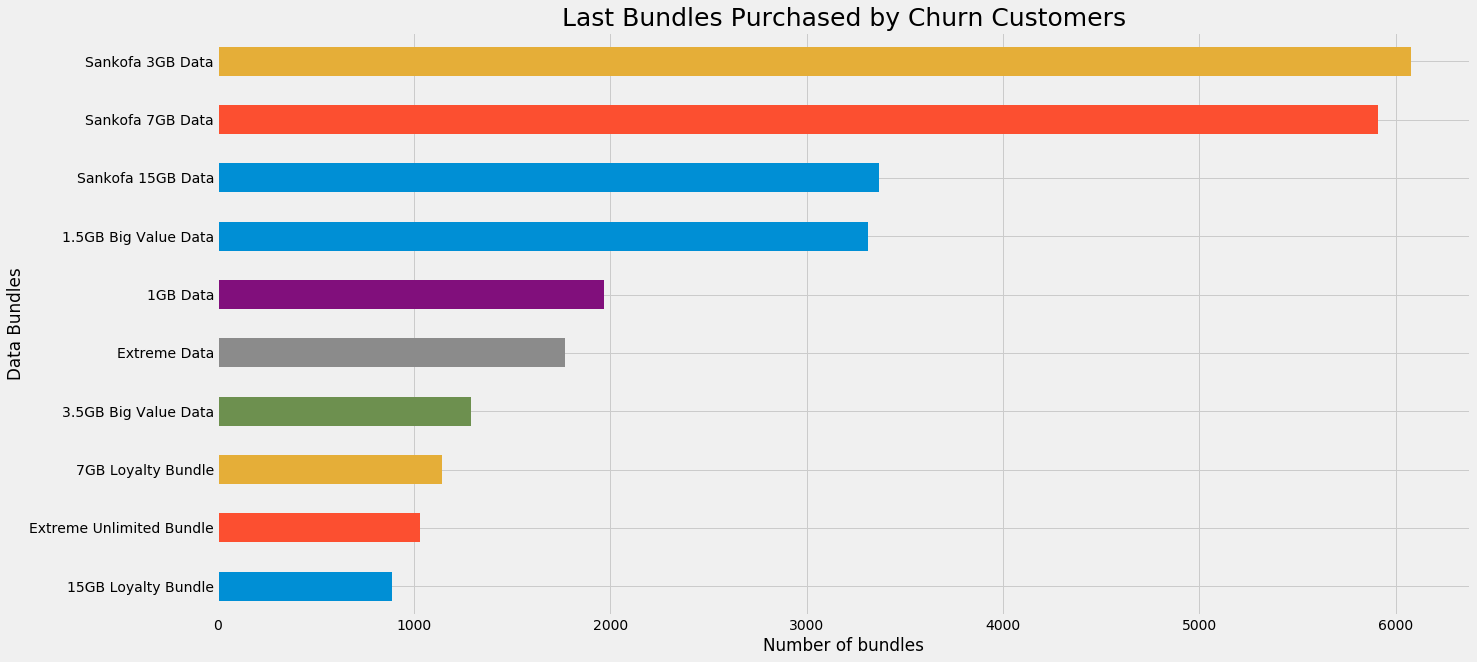

In [125]:


graph =Churn_Subs.OFFER_NAME.value_counts().head(10).sort_values(ascending=True).plot.barh(figsize=(20,10))
plt.title('Last Bundles Purchased by Churn Customers',size=25)
plt.style.use('fivethirtyeight')
plt.xlabel("Number of bundles")
plt.ylabel('Data Bundles')

In [95]:
#(Active_Subs.groupby('OFFER_NAME')['PRICE'].sum()).sort_values(ascending=False)

In [96]:
#graph2=(Active_Subs.groupby('OFFER_NAME')['PRICE'].sum()).sort_values(ascending=True).plot.barh(figsize=(20,15))
#plt.ylabel("Cedis")
#plt.title('Bundles Vrs Revenue Generated')
#plt.xlim(0,190000.0)

In [97]:
#Active_Subs['Weekday_name'].value_counts().sort_values(ascending=False)

In [98]:
#graph3=Active_Subs['Weekday_name'].value_counts().sort_values(ascending=False).plot.bar(figsize=(10,5))
#plt.xlabel('Days of the Week')
#plt.ylabel('Number of Bundles Purchased')
#plt.
#plt.title('Days Active Subs have Purchased Bundles')

In [99]:
#Active_Subs['Weekday_name'].value_counts().iloc[6:]

In [100]:
#DataFrame(Active_Subs.groupby(['Weekday_name','OFFER_NAME'])['OFFER_NAME'].size()).sort_values(by='Weekday_name',ascending=False)

#Active_Subs.pivot_table(index='OFFER_NAME',columns='Weekday_name',aggfunc='count')

In [101]:
#DailyBehave=Active_Subs.pivot_table(index='OFFER_NAME',columns='Weekday_name',aggfunc='size').iloc[:,:7]

In [102]:
#DailyBehave.fillna(0,inplace=True)

In [103]:
#DailyBehave.rename(columns={'ACC_NBR':'DAYS'},inplace=True)

In [104]:
#DailyBehave.reset_index(inplace=True)

FROM OUR CHECKS WE REALISED THAT MOST OF OUR ACTIVE CUSTOMERS PURCHASE DATA